## QUESTION 1

Which statement will create a quantum circuit with four quantum bits and four classical bits?\
**A. QuantumCircuit(4, 4)** \
B. QuantumCircuit(4)\
C. QuantumCircuit(QuantumRegister(4, 'qr0'), QuantumRegister(4, 'cr1')) \
D. QuantumCircuit([4, 4])

**QuantumCircuit has two types of constructor. One receives QuantumRegister and/or ClassicalRegister objects, and another receive just numbers. If Numbers are provided, first is the number of QUBITS and second number of ClassicalRegisters. No mixed parameters are accepted**

**A is Correct - Construct 4 QUBITS and 4 CBITS** \
B Create just 4 QUBITs - NO CBITS constructed \
C Create 8 QUBITS, 4 named qr0 and 4 named cr1 (💡**it is allowed to pass more than one Object of same type**)\
D Arrays as parameters is not a choice

     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘
c: 4/═════
          


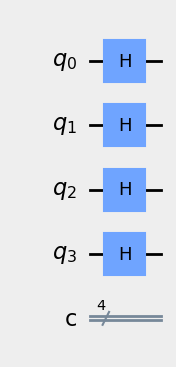

In [32]:
#CALCULATE PROBABILITY 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute

qc = QuantumCircuit(4,4)  #OK 
#QuantumCircuit(QuantumRegister(4, 'qr0'), QuantumRegister(4, 'cr1')) #ok
#QuantumCircuit(QuantumRegister(4), 4) 
#ERROR - Circuit args must be Registers or integers. (['QuantumRegister', 'int']

qc.h([0,1,2,3])
print(qc)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

## QUESTION 2

Given this code fragment, what is the probability that a measurement would result in |0> ?
```
qc = QuantumCircuit(1)
qc.ry(3 * math.pi/4, 0)

```
A. 0.8536 \
B. 0.5\
**C. 0.1464** \
D. 1.0

In [35]:
#CALCULATE PROBABILITY 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute
import math

qc = QuantumCircuit(1)
qc.ry(3 * math.pi/4, 0)                        # First inverted
simulator = Aer.get_backend('statevector_simulator')  # get simulator
result = execute(qc, simulator, shots=1000).result() # 1000 shots
counts = result.get_counts(qc)
print(counts)
#plot_bloch_multivector(qc)

{'0': 0.146446609406726, '1': 0.853553390593274}


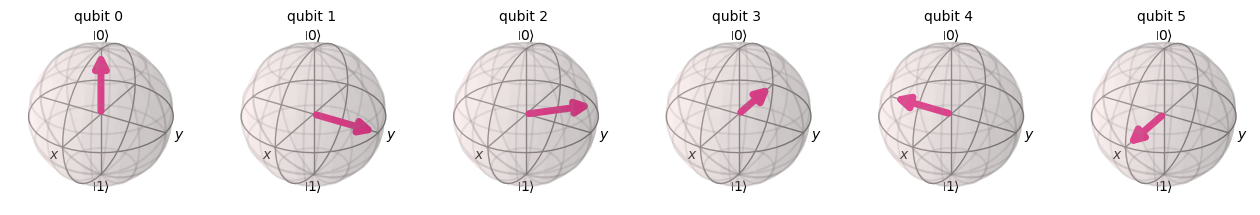

In [37]:
# SHOW BLOCK-SPHERES VARIATIONS
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import math

#qc = QuantumCircuit(6) #qc[0] is initially equal zero (no rotation)
#qc.rx(math.pi/2, 1)    #qc[1] rotates 90 degrees  
#qc.rx(3*math.pi/4, 2)  #qc[2] (PI) rotates a little less than 180 degress (3PI/4) - response
#qc.rx(math.pi, 3)      #qc[3] rotates PI - 180 degrees
#qc.rx(3*math.pi/2, 4)  #qc[4] rotates 270 degrees
#qc.rx(2*math.pi, 5)    #qc[6] rotates 360 Degrees (2PI)
qc.h(1)    #qc[1] rotates 90 degrees  
qc.h(2)  #qc[2] (PI) rotates a little less than 180 degress (3PI/4) - response
qc.h(3)      #qc[3] rotates PI - 180 degrees
qc.h(4)  #qc[4] rotates 270 degrees
qc.h(5)    #qc[6] rotates 360 Degrees (2PI)
#state = Statevector.from_instruction(qc)
#print(state.probabilities)
plot_bloch_multivector(qc)

## Remember to use the right hand rule.
### 💡Point the indicator of right hand into direction of desired axis (Y in this case) other fingers point direction of rotation  - increase angle rotate more hand
\
**💡IN THIS CASE, THE FASTEST WAY TO THINK IN RESPONSE IS: 3PI/4 IS CLOSE TO 1 (PROJECTION ON Z IS CLOSE TO 1 - ⬆️QUBIT 2 IMAGE ON PICTURE) - SO THERE IS A LOW PROBABILITY TO BE ZERO** \
A IS NOT CORRECT BECAUSE 0.8 VALUE IS TOO HIGH - CLOSE TO 1 \
B IS WRONG BECAUSE 0.5 IS ON THE MIDDLE OF SPHERE (EQUAL PROBABILITY OR HADAMARD) (⬆️QUBIT 1 OR QUBIT 4 ON IMAGE)\
**C IS THE RIGHT ANSWER BECAUSE IS CLOSE RESPONSE TO ZERO** \
D IS WRONG BECAUSE IT IS ONE.  - NO PROBABILITY TO BE ZERO (⬆️ QUBIT3 ON IMAGE)\
\
**💡THE RIGHT RESPONSE TO GET |0> IS THE ARROW POINT TO AN ANGLE CLOSE TO NORTH (ZERO), AND THE RIGHT RESPONSE TO GET |1> IS THE ARROW CLOSE AS POSSIBLE TO SOUTH**


## QUESTION 3

Assuming the fragment below, which three code fragments would produce the circuit illustrated?

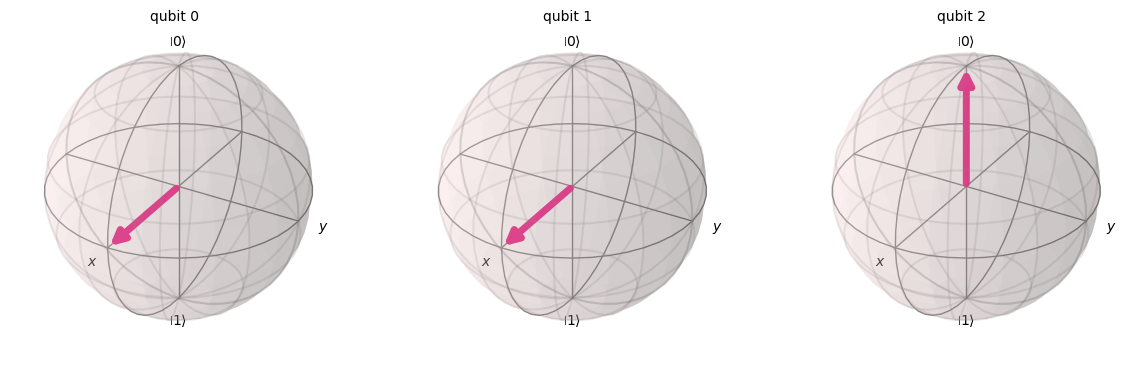

In [41]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit.visualization import plot_bloch_multivector
import math

inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)
# insert code bellow
qc.h(inp_reg) 
qc.h(ancilla)
qc.h(ancilla)
# insert code above
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
#qc.h(inp_reg) #1
#qc.h(inp_reg) #1
#qc.x(ancilla) #1
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
plot_bloch_multivector(qc)

A
```
qc.h(inp_reg)
qc.x(ancilla)
qc.draw()
```
**A is Correct - inp_reg has two QuantumRegister and ancilla one QuantumRegister. Pass an Array as parameter means to apply operator on entire array. In this case, qc.x(inp_reg) applies haddamard (H) on two qubits of inp_reg. The same with one QUBIT of ancilla for X (NOT)**

B. 
```
qc.h(inp_reg[0:2])
qc.x(ancilla[0])
qc.draw()
```
**B is Correct - inp_reg has two elements.**
### 💡Remember on exam that Python elements start on 0 and second index on arrays is the first NOT included on operation.
**So [0:2] means inp_reg[0] and imp_reg[1]**

C. 
```
qc.h(inp_reg[0:1])
qc.x(ancilla[0])
qc.draw()
```
C is NOT Correct - inp_reg[0:1] get just the first element. So this will draw a H on first line, second line will be empty and ancilla will draw X


D. 
```
qc.h(inp_reg[0])
qc.h(inp_reg[1])
qc.x(ancilla[0])
qc.draw()
```
**D is Correct - We can address element by element. So qc.h(inp_reg[0]) followed by qc.h(inp_reg[1]) is the same as qc.h(inp_reg)**

E. 
```
qc.h(inp_reg[1])
qc.h(inp_reg[2])
qc.x(ancilla[1])
qc.draw()
```
E is not Correct because Arrays starts on Zero on Python

F. 
```
qc.h(inp_reg)
qc.h(inp_reg)
qc.x(ancilla)
qc.draw()
```
F is not Correct because call qc.h twice will generate two Hadamards for each line (Uncomment #1 code to see the circuit)

## QUESTION 4

Given an empty QuantumCircuit object, qc, with three qubits and three classical bits, which one of these code fragments would create this circuit?


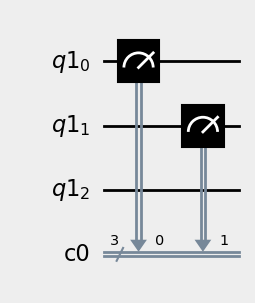

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.measure([0,1], [0,1])
#qc.measure(q,c) #1
#qc.measure_all() #2
#qc.measure(q, [0,1,2]) #3
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

**A. ```qc.measure([0,1,2], [0,1,2])```\
A is Correct, 💡first argument is QuantumRegister elements, or an array of index. Second argument is a ClassicalRegister array, or an array of index. BOTH SHOULD HAVE SAME SIZE.  ```qc.measure(q,c)``` works fine (try #1). ```qc.measure_all()``` works fine also (try #2), but insert a barrier before measure
💡Can be a QuantumRegister as first argument and ClassicalRegister as second, can be two numbers (index for objects) or can be array of index for QuantumRegister as first and array of index for ClassicalRegister as second parameter**\
\
B. ```qc.measure([0,0], [1,1], [2,2])``` \
B is wrong - does not accept arays with QUBIT/CBIT - Just two parameters accepted\
\
C. ```qc.measure_all()```\
C could be right, but create a Barrier before (uncoment #2). Barrier group is a set of instructions for transpiler. Transpiler group a set of instructions elegible for a single QASM instruction. It is not what the question asks for.\
\
D. ```qc.measure(0,1,2)```\
D is wrong - it is not allowed three parameters (just two, one for QuantumRegister or indexes and another for ClassicalRegister or indexes. 
#### 💡By the other hand, it is allowed mixed options. For example, first parameter can be a QuantumRegister array, and second just array of index, and vice versa (uncomment #3  for experiments)

## QUESTION 5

Which code fragment will produce a **maximally entangled, or Bell**, state?

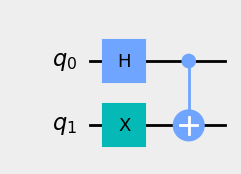

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
bell = QuantumCircuit(2) 
bell.h(0)
bell.x(1)
bell.cx(0, 1)
#bell.cx(0, 1)  #1
#bell.h(0)      #1
#bell.x(1)      #1
#bell.h(0)       #2
#bell.x(1)       #2
#bell.cz(0, 1)   #2
#bell.h(0)        #3
#bell.h(0)        #3

#bell.h(0)        #4
#bell.cx(0, 1)    #4

#bell.x(0)         #5
#bell.h(0)         #5
#bell.cx(0, 1)     #5

#bell.x(0)          #6
#bell.x(1)          #6
#bell.h(0)          #6
#bell.cx(0, 1)      #6

bell.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

**A.** 
```
bell = QuantumCircuit(2) 
bell.h(0)
bell.x(1)
bell.cx(0, 1)
```
**A is correct - So A means -  |01> + |10> / √2*** 
#### Definition : 💡Maximal entanglement here means that determining the state of one qubit lets you completely determine the state of the other qubit. A Works because state of q1 will be defined by q0 in haddamard state. Both values will be defined when visualized by measure (this is a bell state). 

B. 
```
bell = QuantumCircuit(2) 
bell.cx(0, 1)
bell.h(0)
bell.x(1)
```
B is NOT correct because q0 is initially ZERO, and q1 is not inverted so the value is ZERO. After this q0 is hadamard and q1 is ONE. The value of q0 not affect q1 anymore on circuit (uncomment #1 to test)\
\
C. 
```
bell = QuantumCircuit(2) 
bell.h(0)
bell.x(1)
bell.cz(0, 1)
```
C does not work. Beside q0 in haddamard and q1 in |1> cz gate just control phase. It does not turn |0> in |1> or |1> in |0> (uncomment #2 to see circuit)\
\
D. 
```
bell = QuantumCircuit(2) 
bell.h(0)
bell.h(0)
```
D is not correct. It put q0 on haddamard and then get back to Zero again. q1 remain unchanged and is zero. 
#### Even if you put bell.h(0) and bell.h(1), still is not bell state - Bell State one QUBIT must control final result

## All correct possibilities with two QUBITS  

#### 💡 |01> + |10> / √2  
```
bell = QuantumCircuit(2) 
bell.h(0)
bell.x(1)
bell.cx(0, 1)
```

#### 💡 |00> + |11> / √2    # uncomment #4
```
bell.h(0)
bell.cx(0, 1)
```
#### 💡 |00> - |11> / √2   # uncomment  #5
```
bell.x(0)
bell.h(0)
bell.cx(0, 1)
```
#### 💡|01> - |10> / √2   # uncomment #6
```
bell.x(0)
bell.x(1)
bell.h(0)
bell.cx(0, 1)
```

Bell state measurement (BSM), which is a projective measurement onto maximally entangled states

## QUESTION 6

**Given this code, which two inserted code fragments result in the state vector represented by this Bloch sphere?**

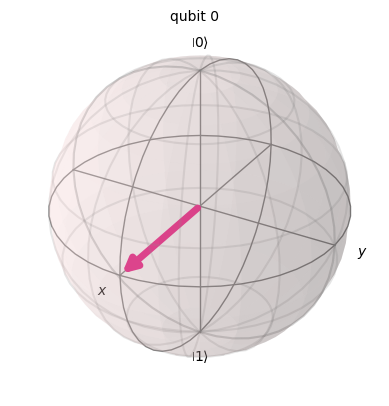

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute

qc = QuantumCircuit(1,1)
# Insert code fragment here
qc.h(0)  #correct
#qc.rx(math.pi / 2, 0) #1 wrong
#qc.ry(math.pi / 2, 0) #2 ok
#qc.rx(math.pi / 2, 0) #3 wrong
#qc.rz(-math.pi / 2, 0)#3 wrong
#qc.ry(math.pi, 0)  #4 wrong

#qc.rx(-math.pi / 2, 0) #5 ok
#qc.rz(-math.pi / 2, 0) #5 ok 

#qc.rx(math.pi / 2, 0) #6 ok
#qc.rz(math.pi / 2, 0) #6 ok

#qc.ry(-math.pi / 2, 0) #7 ok
#qc.rz(-math.pi, 0)    #7 ok

simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_bloch_multivector(outputstate)


**A. `qc.h(0)`
A is correct because put QUBIT on hadamard, wich is a X+Z rotation. QUBIT starts with ZERO, so H rotates and direct arrow to X axis**

B. `qc.rx(math.pi / 2, 0)` 
B does not work because point to negative Y axis (uncomment #1). Remember the right hand rule, explored on Question 1

**C. `qc.ry(math.pi / 2, 0) `
C is correct. QUBIT starts on Zero and rotate on Y axis (right hand Rule) by pi/2 (uncomment #2)**

D. `qc.rx(math.pi / 2, 0) 
qc.rz(-math.pi / 2, 0)`
D does not work. Point to negative direction of X Axis (uncomment #3)

E. `qc.ry(math.pi, 0)`
Does not work Rotation of PI on Y Axis point to South (|1>) (uncomment #4)

## Other Available options

```💡
qc.rx(-math.pi / 2, 0)
qc.rz(-math.pi / 2, 0)
```  
(uncomment #5) (a good exercize could be uncomment and run first line and then uncomment and run second line to follow trajetory)

```💡
qc.rx(math.pi / 2, 0)
qc.rz(math.pi / 2, 0) 
```  
(uncomment #6)(good exercize could be uncomment and run first line and then uncomment and run second line to follow trajetory)

```💡
qc.y(-math.pi / 2, 0)    
qc.z(-math.pi, 0)
```
(uncomment #7) (good exercize could be uncomment and run first line and then uncomment and run second line to follow trajetory)

## QUESTION 7

S-gate is a Qiskit phase gate with what value of the phase parameter?\
A. π/4 \
**B. π/2 Correct answer** \
C. π/8 \
D. π

💡S turn around Z Axis . Allways move π/2 \ 
💡RX,RY e RZ Gates by the other hand, receive first parameter to provide rotate angle \

#### 💡T  ROTATE PI/4   (45 Degrees OR PI/4  on Z)
#### 💡T⨥ ROTATE -PI/4 (-45 Degrees OR  7PI/4 on Z)
#### 💡S  ROTATE PI/2  on Z
#### 💡S⨥ ROTATE -PI/2 on Z

## QUESTION 8

Which two code fragments, when inserted into the code below, will produce the statevector shown in the output?
  
```
from qiskit import QuantumCircuit, Aer, execute
from math import sqrt
qc = QuantumCircuit(2)
   #Insert fragment here
simulator = Aer.get_backend('statevector_simulator') 
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)
```
Output:
  `[0.707+0.j       0.+0.j       0.+0.j       0.707+0.j]`


In [83]:
from qiskit import QuantumCircuit, Aer, execute
from math import sqrt
qc = QuantumCircuit(2)
#v = [1/sqrt(2), 0, 0, 1/sqrt(2)]  #A Correct
#qc.initialize(v,[0,1])            #A Correct

qc.h(0)      #B Correct
qc.cx(0,1)   #B Correct

#v1, v2 = [1,0], [0,1] # C is wrong - only 00 is correct
#qc.initialize(v1,0)   # C is wrong - only 00 is correct
#qc.initialize(v2,1)   # C is wrong - only 00 is correct

#qc.cx(0,1)       # D is wrong
#qc.measure_all() # D is Wrong

#qc.h(0)           #E wrong
#qc.h(1)           #E wrong
#qc.measure_all()  #E wrong

simulator = Aer.get_backend('statevector_simulator') 
result = execute(qc, simulator).result() 
statevector = result.get_statevector() 
print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


**A.** 
```
v=[1/sqrt(2), 0, 0, 1/sqrt(2)] \ 
qc.initialize(v,[0,1])
```
**A is correct Valid values can be 00 or 11**

**B.** 
```
qc.h(0)\
qc.cx(0,1)
```
**B is Correct - valid values are 00 or 11**

C. 
```
v1, v2 = [1,0], [0,1]\ 
qc.initialize(v1,0)\ 
qc.initialize(v2,1)
```
C is Wrong

D. 
```
qc.cx(0,1)\ 
qc.measure_all()
```
D is Wrong
Result is allways 00
`[1.+0.j,   0.+0.j,   0.+0.j,    0.+0.j]`\
Prob 00    Prob 01   Prob 10    Prob 11\
1/√1 = 1 for 00

E. 
```
qc.h(0)\ 
qc.h(1)\ 
qc.measure_all()
```
E is Wrong
```
1/√4 = 0.5 for 00,01,10,11\
[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j]\
```
Prob 00   Prob 01  Prob 10   Prob 11


## Algorithm easy to remember 
---

#### 💡1 - Count values on Array with no Zero (or if it is a circuit, enumerate all probabilities for output)
#### 💡2 - The value of each value on array is  1/√n (where n is the count of probabilities)
#### 💡3 - IF Control QUBIT is in hadamard, signal should be considered (SEE STATEVECTOR AT THE END) 
**for example :
```
qc = QuantumCircuit(2) # create 2 QUBITS \
qc.x(0)  # invert QUBIT 0 - it is 1 now \
qc.h(1)  # put one in hadamard \
qc.cx(1,0) # QUBIT 1 now entangled QUBIT 0
```
for this code, Valid outputs are 10 and 01 (when q[1] is zero q[0] is one, when q[1] is 1 then q[0] is 0)
We have two valid numbers 1/√2 = 0.70710678+0.j 
The output array should be [0.+0j  0.70710678+0.j  0.70710678+0.j 0+0j] (values for [00 01 10 11] in this order)**

---


#### 💡1/√2 = 0.70710678+0.j 
#### 💡1/√4 = 0.5+0j

Result is 01 ou is 10
```
qc.h(0) 
qc.x(1)  
qc.cx(0,1)
[0.+0.j,        0.70710678+0.j,  0.70710678+0.j,  0.+0.j]
```
Prob de 00.     Prob 01          Prob10           Prob11

C - first QUBIT is Zero
`[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]`

Example for 3 QUBITS
```
qc.h(0)    
qc.cx(0,1)  
qc.h(2)
Valid values are 000, 011, 100, 111 (so each value is 1/√4)
[0.5+0.j, 0.+0.j, 0.+0.j, 0.5+0.j, 0.5+0.j, 0.+0.j, 0.+0.j, 0.5+0.j]
```
 000      001     010     011      100      101     110   111

In [5]:
# C RESPONSE
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit import Aer, BasicAer, execute

qc = QuantumCircuit(2)
v1, v2 = [1,0], [0,1]
qc.initialize(v1,0) 
qc.initialize(v2,1)

simulator = Aer.get_backend ('statevector_simulator')
job = execute (qc, simulator)
result = job.result ()
outputstate = result.get_statevector (qc, 2)
print (outputstate)

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


## QUESTION 9

Which code fragment will produce a multi-qubit gate other than a CNOT ?\
A. ```qc.cx(0,1)```

B. ```qc.cnot(0,1)```

C. ```qc.mct([0],1)```

**D. ```qc.cz(0,1)``` - Correct**

Multi-qubit are qubits dependant each other \
The question asks for **OTHER THAN CNOT** \
A is CNOT (cx) \
B is CNOT (cnot) \
C does not exist as operator (mct) \
D is a multi-qbit that rotate on Z axis (change phase only) \

 **💡 - Remember cx and cnot are same operation**


##### Common Gates
GATE | rotation | name |
--- | --- | ---- |
qc.h | X+Z (pi) | hadamard (no angle) |
qc.i,qc.id | 0 | identity (no effect) |
qc.p | Z (∅) | Phase (change Phase - rotate Z Axis) |
qc.rx | X (∅) | RX  (need angle) | 
qc.ry | Y (∅) | RY  (need angle) | 
qc.rz | Z (∅) | RZ  (need angle) | 
qc.s | Z (PI/2) | same as p(PI/2, gate) | 
qc.sdg | Z (3PI/2) | same as p(3PI/2, gate) | 
qc.sx | X (PI/2) | same as rx(PI/2, gate) | 
qc.t | Z (PI/4) | same as p(PI/4, gate) | 
qc.tdg | Z (7PI/4) | same as p(7PI/4, gate) | 
qc.u | Y,Z,Z | Apply 3 angles to QUBIT (Y,Z,Z) this order  | 
qc.x | X | same as rx(PI, gate) | 
qc.y | Y | same as ry(PI, gate) | 
qc.z | z | same as rz(PI, gate) | 
###### MultiGates
GATE | rotation | name | 
--- | --- | ---- |
qc.ccx | X | X rotate controled by 2 QUBITs (no angle) - AKA TOFFOLI | 
qc.c3sx | sx | X rotate controled by 3 QUBITs (angle) | 
qc.c4sx | x | X rotate controled by 4 QUBITs (no angle) | 
qc.ch | H | Aply hadamard accoring control gate (no angle) | 
qc.cp | Y | Apply phase (Z) with angle controlled | 
qc.crx | X | rotate X with provided angle controled | 
qc.cry | Y | rotate Y with provided angle (same as TOFFOLI) | 
qc.crzb | Z | rotate Z with provided angle | 
qc.cswap | swap | swap two controled qubits | 
qc.csx | sx | pi/2 (square root) controled | 
qc.cu  | Y,Z,Z  | U controled | 
qc.cx,qc.cnot | X | Apply x controled (inversor) | 
qc.cy | Y | Apply y controled | 
qc.cz | Z | Apply z controled | 
qc.dcx | cx | Double cnot on two qubits (q1 cntrl q2 and q2 cntrl q1) | 
qc.iswap | swap | swap two qubits change phase | 
qc.mcp | P | apply phase 3 control | 
qc.mcx | X | apply X 3 control | 
qc.swap | swap | swap two qubits | 

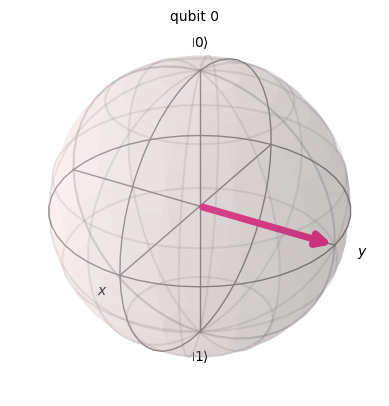

In [176]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute

qc = QuantumCircuit(1,1)
#qc.rx(math.pi/2, 0)
qc.h(0)
qc.t(0)
#qc.barrier(0)
qc.t(0)
#qc.h(0)
#qc.measure(0,0)
#qc.ry(math.pi, 0)
#qc.y(0)
#qc.u(math.pi/4, math.pi/8, math.pi/16, 0)
#qc.u(3*math.pi/2, 0, 0, 0)
#qc.u(0, math.pi/2, 0, 0)
#qc.u(0, 0, math.pi/2, 0)
simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_bloch_multivector(outputstate)

## QUESTION 10

Which code fragment will produce a multi-qubit gate other than a Toffoli?\
A. `qc.ccx(0,1,2)`\
Wrong because ccx is Toffoli - question asks other than

B. `qc.mct([0,1], 2)`\
wrong - mcx is the name on qiskit

C. \
``` 
from qiskit.circuit.library import CXGate 
ccx = CXGate().control()  # Wrong - sintax error 
qc.append(ccx, [0,1,2]) 
```

**D. - Correct**
```
qc.cry(0,1,2)
``` 
RIGHT - Rotation controled on Y inverts qubit same as ccx


#### 💡The Toffoli gate, also known as the double controlled-NOT gate (CCX), has two control qubits and one target. It applies a NOT to the target only when both controls are in state 1 **

## QUESTION 11

Which two options would place a barrier across all qubits to the QuantumCircuit below? \
`qc = QuantumCircuit(3,3)` 

A. `qc.barrier(qc)`
Wrong use qc and qc as parameter

**B. `qc.barrier([0,1,2])` - ok** 

**C. `qc.barrier()` 
ok, also valid - no parameter applies to all qubits, array select qubits**

D. `qc.barrier(3)`
Wrong - should be array - [3] works fine

E. `qc.barrier_all()`
wrong - no method barrier_all

## REMEMBER qc.barrier() creates a barrier on all gates, but measure_all() make measure on all gates - measure(), by the other hand, is not a valid method

## QUESTION 12

What code fragment codes the equivalent circuit if you remove the barrier in the following QuantumCircuit?

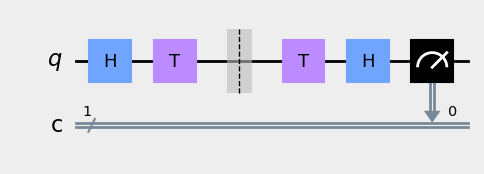

In [160]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qc = QuantumCircuit(1,1) 
qc.h(0)
qc.t(0)
qc.barrier(0)
qc.t(0)
qc.h(0)
qc.measure(0,0)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

**A. Correct - t rotate pi/4 on Z - s rotate pi/2 on Z - two t in sequence is the same as s (see table in question 9)**
```
qc = QuantumCircuit(1,1)
qc.h(0)
qc.s(0)   # the same as qc.t(0) followed by qc.t(0)
qc.h(0)
qc.measure(0,0)
```

B.
```
qc = QuantumCircuit(1,1)
qc.measure(0,0)
```


C.
```
qc = QuantumCircuit(1,1) 
qc.h(0) 
qc.t(0) 
qc.tdg(0) 
qc.h(0) 
qc.measure(0,0)
```

D.
```
qc = QuantumCircuit(1,1)  
qc.h(0) 
qc.z(0) 
qc.h(0) 
qc.measure(0,0)
```

This kind of question uses similar rotation 
GATE | rotation | name | 
--- | --- | --- |
qc.h | X+Z (pi) | hadamard (no angle) | 
qc.i,qc.id | 0 | identity (no effect) | 
qc.p | Z (∅) | Phase (change Phase - rotate Z Axis) | 
qc.rx | X (∅) | RX  (need angle) | 
qc.ry | Y (∅) | RY  (need angle) | 
qc.rz | Z (∅) | RZ  (need angle) | 
qc.s | Z (PI/2) | same as p(PI/2, gate) | 
qc.sdg | Z (3PI/2) | same as p(3PI/2, gate) | 
qc.sx | X (PI/2) | same as rx(PI/2, gate) | 
qc.t | Z (PI/4) | same as p(PI/4, gate) | 
qc.tdg | Z (7PI/4) | same as p(7PI/4, gate) | 
qc.u | Y,Z,Z | Apply 3 angles to QUBIT (Y,Z,Z) this order |  
qc.x | X | same as rx(PI, gate) | 
qc.y | Y | same as ry(PI, gate) | 
qc.z | z | same as rz(PI, gate) | 
      
      
**q.t(0) rotate PI/4 on Z\
q.s(0) rotate PI/2 on Z\
q.sdg(0) rotate 3PI/2 on Z\
q.tdg(0) rotate 7PI/4 on Z\
q.sx(0) rotate PI/2 on X\
q.x(0) rotate PI on X\
q.y(0) rotate PI on Y\
q.z(0) rotate PI on Z**

#### Based on that (other options): 
#### 2 * q.t() = q.s()
#### 2 * q.t() = q.rz(math.pi/4, 0)
#### 2* q.s() = 4 * q.t()
#### 2 * q.sx() = q.x()




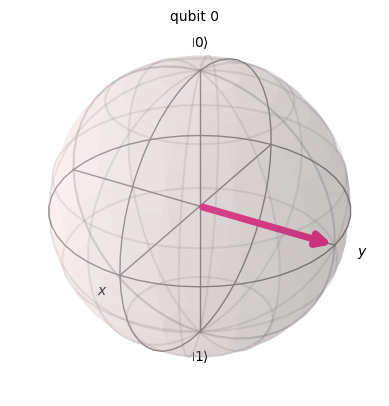

In [199]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute

qc = QuantumCircuit(1,1)
qc.rx(math.pi/2,0)
#qc.x(0)
#qc.sx(0)
#qc.sx(0)
#qc.rz(math.pi/4, 0)
simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_bloch_multivector(outputstate)

## QUESTION 13

Given the following code, what is the depth of the circuit?
```  
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])
```

**A. 2 - OK  Barrier is ignored by depth**\
B. 3\
C. 4\
D. 5

2


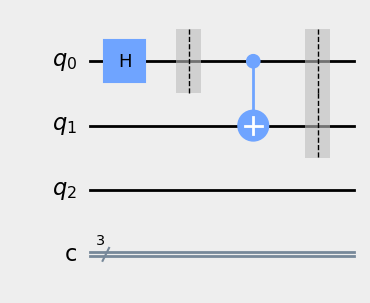

In [596]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])
depth = qc.depth()
print(depth)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 14

Which code snippet would execute a circuit given these parameters?\
1)Measure the circuit 1024 times,\
2)use the QASM simulator,\
3)and use a coupling map that connects three qubits linearly\
```
qc = QuantumCircuit(3)
#Insert code fragment here
result = job.result()
```
**A. - correct**
```
qasm_sim = Aer.get_backend('qasm_simulator') 
couple_map = [[0, 1], [1, 2]]
job = execute(qc, backend=qasm_sim, shots=1024, coupling_map=couple_map)**
```
B. 
```
qasm_sim = Aer.getBackend('ibmq_simulator') 
couple_map = [[0, 1], [0, 2]]
job = execute(qc, loop=1024, coupling_map=couple_map) 
```
C. 
```
qasm_sim = Aer.get_backend('qasm_simulator') 
couple_map = [[0, 1], [1, 2]]
job = execute(qc, backend=qasm_sim, repeat=1024, coupling_map=couple_map)
```
D. 
```
qasm_sim = Aer.get_backend('qasm_simulator') 
couple_map = [[0, 1], [1, 2]]
job = execute(backend=qasm_sim, qc, shot=1024, coupling_map=couple_map)
```

##### Common parameters 
**shots = number executions**
thre is no ibmq_simulator
def execute(experiments, **backend**,
            basis_gates=None, **coupling_map=None**,  # circuit transpile options
            backend_properties=None, initial_layout=None,
            seed_transpiler=None, optimization_level=None, pass_manager=None,
            qobj_id=None, qobj_header=None, shots=1024,  # common run options
            memory=False, max_credits=10, seed_simulator=None,
            default_qubit_los=None, default_meas_los=None,  # schedule run options
            schedule_los=None, meas_level=MeasLevel.CLASSIFIED,
            meas_return=MeasReturnType.AVERAGE,
            memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None,
            parameter_binds=None, schedule_circuit=False, inst_map=None, meas_map=None,
            scheduling_method=None, init_qubits=None,
            **run_config**):
            
##### Description parameters 
experiments (QuantumCircuit or list[QuantumCircuit] or Schedule or list[Schedule]) – Circuit(s) or pulse schedule(s) to execute

backend (Backend) – Backend to execute circuits on. Transpiler options are automatically grabbed from backend.configuration() and backend.properties(). If any other option is explicitly set (e.g. coupling_map), it will override the backend’s.

basis_gates (list[str]) – List of basis gate names to unroll to. e.g: ['u1', 'u2', 'u3', 'cx'] If None, do not unroll.

coupling_map (CouplingMap or list) –

Coupling map (perhaps custom) to target in mapping. Multiple formats are supported:

CouplingMap instance

list Must be given as an adjacency matrix, where each entry specifies all two-qubit interactions supported by backend e.g: [[0, 1], [0, 3], [1, 2], [1, 5], [2, 5], [4, 1], [5, 3]]

backend_properties (BackendProperties) – Properties returned by a backend, including information on gate errors, readout errors, qubit coherence times, etc. Find a backend that provides this information with: backend.properties()

initial_layout (Layout or dict or list) –

Initial position of virtual qubits on physical qubits. If this layout makes the circuit compatible with the coupling_map constraints, it will be used. The final layout is not guaranteed to be the same, as the transpiler may permute qubits through swaps or other means.

Multiple formats are supported:

qiskit.transpiler.Layout instance

dict:

virtual to physical:

{qr[0]: 0,
 qr[1]: 3,
 qr[2]: 5}
physical to virtual:

{0: qr[0],
 3: qr[1],
 5: qr[2]}
list:

virtual to physical:

[0, 3, 5]  # virtual qubits are ordered (in addition to named)
physical to virtual:

[qr[0], None, None, qr[1], None, qr[2]]
seed_transpiler (int) – Sets random seed for the stochastic parts of the transpiler

optimization_level (int) – How much optimization to perform on the circuits. Higher levels generate more optimized circuits, at the expense of longer transpilation time. #. No optimization #. Light optimization #. Heavy optimization #. Highest optimization If None, level 1 will be chosen as default.

pass_manager (PassManager) – The pass manager to use during transpilation. If this arg is present, auto-selection of pass manager based on the transpile options will be turned off and this pass manager will be used directly.

qobj_id (str) – DEPRECATED: String identifier to annotate the Qobj. This has no effect and the name attribute of the input circuit(s) should be used instead.

qobj_header (QobjHeader or dict) – DEPRECATED: User input that will be inserted in Qobj header, and will also be copied to the corresponding qiskit.result.Result header. Headers do not affect the run. Headers do not affect the run. This kwarg has no effect anymore and the metadata attribute of the input circuit(s) should be used instead.

shots (int) – Number of repetitions of each circuit, for sampling. Default: 1024

memory (bool) – If True, per-shot measurement bitstrings are returned as well (provided the backend supports it). For OpenPulse jobs, only measurement level 2 supports this option. Default: False

seed_simulator (int) – Random seed to control sampling, for when backend is a simulator

default_qubit_los (Optional[List[float]]) – List of job level qubit drive LO frequencies in Hz. Overridden by schedule_los if specified. Must have length n_qubits.

default_meas_los (Optional[List[float]]) – List of job level measurement LO frequencies in Hz. Overridden by schedule_los if specified. Must have length n_qubits.

qubit_lo_range (Optional[List[List[float]]]) – List of job level drive LO ranges each of form [range_min, range_max] in Hz. Used to validate qubit_lo_freq. Must have length n_qubits.

meas_lo_range (Optional[List[List[float]]]) – List of job level measurement LO ranges each of form [range_min, range_max] in Hz. Used to validate meas_lo_freq. Must have length n_qubits.

schedule_los (list) –

Experiment level (ie circuit or schedule) LO frequency configurations for qubit drive and measurement channels. These values override the job level values from default_qubit_los and default_meas_los. Frequencies are in Hz. Settable for qasm and pulse jobs.

If a single LO config or dict is used, the values are set at job level. If a list is used, the list must be the size of the number of experiments in the job, except in the case of a single experiment. In this case, a frequency sweep will be assumed and one experiment will be created for every list entry.

Not every channel is required to be specified. If not specified, the backend default value will be used.

meas_level (int or MeasLevel) – Set the appropriate level of the measurement output for pulse experiments.

meas_return (str or MeasReturn) – Level of measurement data for the backend to return For meas_level 0 and 1: "single" returns information from every shot. "avg" returns average measurement output (averaged over number of shots).

memory_slots (int) – Number of classical memory slots used in this job.

memory_slot_size (int) – Size of each memory slot if the output is Level 0.

rep_time (int) – Time per program execution in seconds. Must be from the list provided by the backend (backend.configuration().rep_times). Defaults to the first entry.

rep_delay (float) – Delay between programs in seconds. Only supported on certain backends (backend.configuration().dynamic_reprate_enabled ). If supported, rep_delay will be used instead of rep_time and must be from the range supplied by the backend (backend.configuration().rep_delay_range). Default is given by backend.configuration().default_rep_delay.

parameter_binds (list[dict]) – List of Parameter bindings over which the set of experiments will be executed. Each list element (bind) should be of the form {Parameter1: value1, Parameter2: value2, ...}. All binds will be executed across all experiments, e.g. if parameter_binds is a length-
 list, and there are 
 experiments, a total of 
 experiments will be run (one for each experiment/bind pair).

schedule_circuit (bool) – If True, experiments will be converted to qiskit.pulse.Schedule objects prior to execution.

inst_map (InstructionScheduleMap) – Mapping of circuit operations to pulse schedules. If None, defaults to the instruction_schedule_map of backend.

meas_map (list(list(int))) – List of sets of qubits that must be measured together. If None, defaults to the meas_map of backend.

scheduling_method (str or list(str)) – Optionally specify a particular scheduling method.

init_qubits (bool) – Whether to reset the qubits to the ground state for each shot. Default: True.

run_config (dict) – Extra arguments used to configure the run (e.g. for Aer configurable backends). Refer to the backend documentation for details on these arguments. Note: for now, these keyword arguments will both be copied to the Qobj config, and passed to backend.run()

## QUESTION 15

Which of these would execute a circuit on a set of qubits which are coupled in a custom way?

```
from qiskit import QuantumCircuit, execute, BasicAer 
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)
    # insert code here
```

**A. execute(qc, backend, shots=1024, coupling_map=[[0,1], [1,2]])** \
B. execute(qc, backend, shots=1024, custom_topology=[[0,1],[2,3]]\
C. execute(qc, backend, shots=1024, device="qasm_simulator", mode="custom")\
D. execute(qc, backend, mode="custom")

B. Wrong because there is no **custom_topology**\
C. is wrong no **mode**\
D. is wrong no **mode**\


## QUESTION 16

Which three simulators are available in BasicAer?\
**A. qasm_simulator**\
B. basic_qasm_simulator\
**C. statevector_simulator**\
**D. unitary_simulator**\
E. quantum_simulator\
F. quantum_circuit_simulator\
 
 **AerSimulator('aer_simulator')\
 AerSimulator('aer_simulator_statevector')\
 AerSimulator('aer_simulator_density_matrix')\
 AerSimulator('aer_simulator_stabilizer')\
 AerSimulator('aer_simulator_matrix_product_state')\
 AerSimulator('aer_simulator_extended_stabilizer')\
 AerSimulator('aer_simulator_unitary')\
 AerSimulator('aer_simulator_superop')\
 QasmSimulator('qasm_simulator')\
 StatevectorSimulator('statevector_simulator')\
 UnitarySimulator('unitary_simulator')\
 PulseSimulator('pulse_simulator')**

**qasm_simulator\
qasm_simulator_py\
statevector_simulator\
statevector_simulator_py\
unitary_simulator\
clifford_simulator**
 
```
circ = QuantumCircuit(2)\
circ.h(0)\
circ.cx(0, 1)\
circ.measure_all()\
```

# Transpile for simulator
```
simulator = Aer.get_backend('aer_simulator')\
circ = transpile(circ, simulator)\
```
**transpile converts code for execution or simulation**\

# Run and get counts
```
result = simulator.run(circ).result()\
counts = result.get_counts(circ)\
plot_histogram(counts, title='Bell-State counts')\
```

## QUESTION 17

Which line of code would assign a statevector simulator object to the variable backend ?

A. `backend = BasicAer.StatevectorSimulatorPy()` \
**B. `backend = BasicAer.get_backend('statevector_simulator')`** \
C. `backend = BasicAer.StatevectorSimulatorPy().name()`\
D. `backend = BasicAer.get_back('statevector_simulator')`\


```
#Using GPU
simulator_gpu = Aer.get_backend('aer_simulator')\
simulator_gpu.set_options(device='GPU')\
```

## QUESTION 18

Which code fragment would yield an operator that represents a single-qubit X gate?

A. `op = Operator.Xop(0)`

B. `op = Operator([[0,1]])`

**C. correct**
```
qc = QuantumCircuit(1) 
qc.x(0)
op = Operator(qc)
```
D. `op = Operator([[1,0,0,1]])`

## QUESTION 19

What would be the fidelity result(s) for these two operators, which differ only by global phase?
```
op_a = Operator(XGate())\
op_b = numpy.exp(1j * 0.5) * Operator(XGate())\
```
A. state_fidelity() of 1.0\
B. state_fidelity() and average_gate_fidelity() of 1.0\
**C. average_gate_fidelity() and process_fidelity() of 1.0**\
D. state_fidelity(), average_gate_fidelity() and process_fidelity() of 1.0\

## QUESTION 20

Given this code fragment, which output fits most closely with the measurement probability distribution?
```
qc = QuantumCircuit(2, 2)      
qc.x(0)                        
qc.measure([0,1], [0,1])       # First parameter QREG, second CREG

simulator = Aer.get_backend('qasm_simulator') 
result = execute(qc, simulator, shots=1000).result() 
counts = result.get_counts(qc)
print(counts)
```
A. {'00': 1000}

**B. {'01': 1000} - 01 means QBIT1 | QBIT0**

C. {'10': 1000} 

D. {'11': 1000}

In [216]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute
qc = QuantumCircuit(2, 2)       # create 2 QUBITS and 2 CBITS
qc.x(0)                         # First inverted
qc.measure([0,1], [0,1])        # first parameter QUBITS and second CBITS
simulator = Aer.get_backend('qasm_simulator')  # get simulator
result = execute(qc, simulator, shots=1000).result() # 1000 shots
counts = result.get_counts(qc)
print(counts)

{'01': 1000}


It is possible to call measure with lists of qubits and cbits as a shortcut for one-to-one measurement. 
These two forms produce identical results:

```
circuit = QuantumCircuit(2, 2)
circuit.measure([0,1], [0,1])
```
## OR 
```
circuit = QuantumCircuit(2, 2)
circuit.measure(0, 0)
circuit.measure(1, 1)
```
## OR 
```
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qreg = QuantumRegister(2, "qreg")
creg = ClassicalRegister(2, "creg")
circuit = QuantumCircuit(qreg, creg)
circuit.measure(qreg, creg)
```
## OR
```
circuit = QuantumCircuit(qreg, creg)
circuit.measure(qreg[0], creg[0])
circuit.measure(qreg[1], creg[1])
```

## QUESTION 1 - ASSESSMENT

In the code below, which line should be removed so that the output of qc.draw() is as per the image shown?

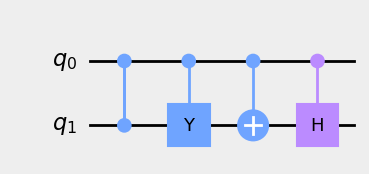

In [552]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute
from math import pi 

qc = QuantumCircuit(2)
qc.swap(0,1)
qc.cz(0,1)
qc.cy(0,1)
qc.cx(0,1)
qc.ch(0,1)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})


A. qc.cx(0,1)\
**B. qc.swap(0,1)** \
C. qc.cy(0,1)\
D. qc.cz(0,1)\

## QUESTION 2 - ASSESSMENT

How Many qubits this Q-Sphere represent?\
![qsphere](q-sphere.png)


A. 2\
B. 4\
C. 5\
**D. 3**

![slide3](qsphere-divisions.png)

#### Number of divisions on Q-Sphere indicate the number of QUBITS
#### So this image should have 3 QUBITS

## QUESTION 3 - ASSESSMENT

I Would like to determine how close my predicted state sv1 is to calculated output state sv2 of a circuit.\
```
from qiskit.quantum_info import state_fidelity \
#set up qc1 and qc2 \
backend = Aer.get_backend('state_vector') \
sv1 = execute(qc1, backend).result().get_statevector(qc1) \
sv2 = execute(qc2, backend).result.get_statevector(qc2) \
```
In order to confirm that the state obtained at the end of the circuit calculations corresponds exactly to the predicted state, wich result would I hope to achieve?

A. `state_fidelity(sv1, sv2) == 0.0`\
B. `state_fidelity(sv1, sv2) == 0.5`\
C. `process_fidelity(sv1, sv2) == 1.0`\
**D. `state_fidelity(sv1, sv2) == 1.0`** 

In [38]:
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix
from qiskit import Aer
from qiskit import QuantumCircuit

qc1 = QuantumCircuit(1)
qc2 = QuantumCircuit(1)
#backend = Aer.get_backend('state_vector')
backend = Aer.get_backend('statevector_simulator') 
sv1 = execute(qc1, backend).result().get_statevector(qc1)
sv2 = execute(qc2, backend).result().get_statevector(qc2)
print(state_fidelity(sv1, sv2) == 1.0)

True


## QUESTION 4 - ASSESSMENT

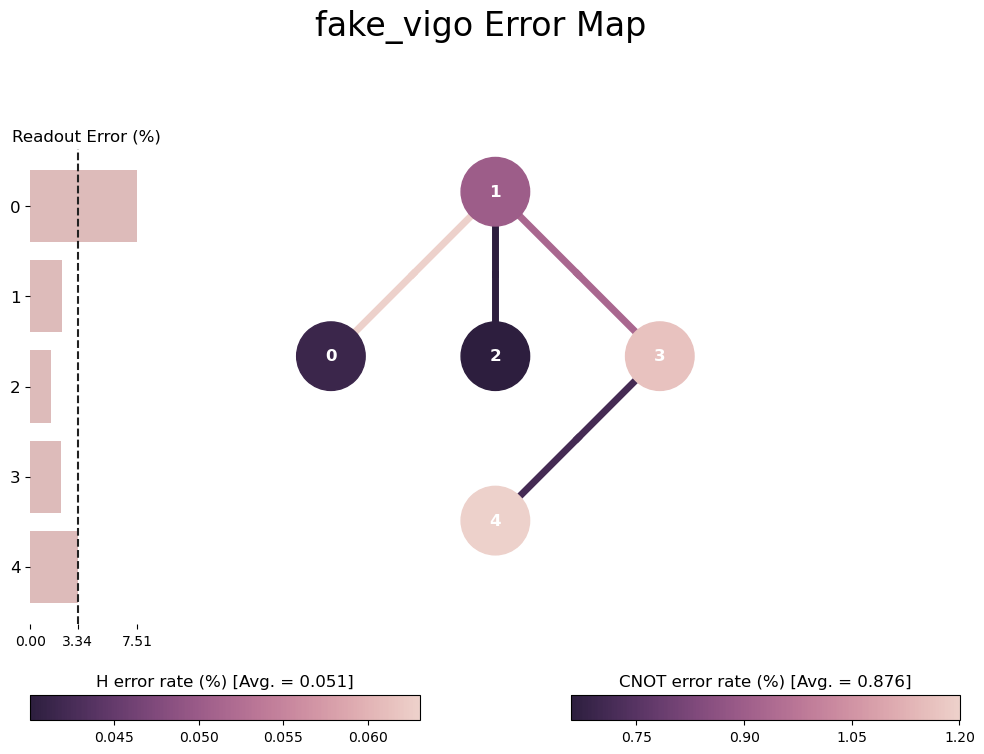

In [613]:
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_error_map
from qiskit.providers.fake_provider import FakeVigoV2

backend = FakeVigoV2()
plot_error_map(backend)

A. backend = provider.get_backend('ibmq_athens')\
plot_VisualizationError(backend)

**B. backend = provider.get_backend('ibmq_athens')\
plot_error_map(backend)**

C. backend = provider.get_backend('ibmq_athens')\
plot_gate_map(backend)

D. backend = provider.get_backend('ibmq_athens')\
plot_error.gate_map(backend)

## QUESTION 5 - ASSESSMENT

Wich fragment will create the circuit shown when inserted into the code below?\
```
from qiskit import QuantumCircuit \
qc = QuantumCircuit(3) \
  insert code fragment here \
```

A. ```for n in range(len(qc.bits)):
      qc.measure(n,n)```
     
**B. `qc.measure_all()` - correct**

C. `qc.measure()`

D. ```qc.measure (0,0) \
qc.measure(1,1) \
qc.measure(2,2)```



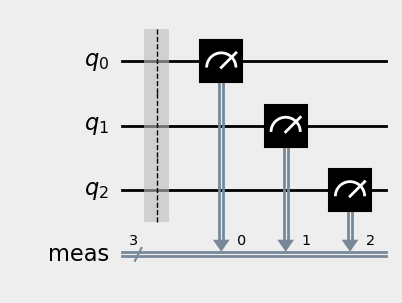

In [54]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute
from math import pi 

qc = QuantumCircuit(3)
#qc.measure(0,0)
#qc.measure(1,1)
#qc.measure(2,2)
qc.measure_all()
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 6 - ASSESSMENT

The Phase gate is a parameterized gate that rotates around which axis of the Bloch sphere?\

A. H-axis\
B. Y-Axis\
C. X-Axis\
**D. Z-Axis**

## QUESTION 7 - ASSESSMENT

Given this statement, wich code fragment would create a quantum circuit from its QASM string?\

```
qasm str = """OPENQASM 2.0;\
include "qelib1.inc";\
x q[0];\
h q[1]; """\
```

A. `qc.QuantumCircuit(qasm_str)`

B. `qc = QuantumCircuit.load_qasm_str(qasmstr)`

C. `qc= QuantumCircuit(2)
qc.load_qasm_str(qasm_str)`

**D. `qc = QuantumCircuit.from_qasm_str(qasm_str)`**

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


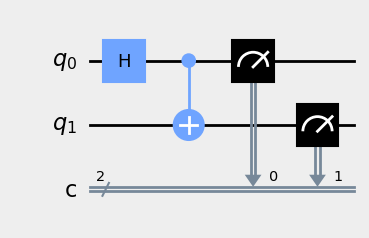

In [236]:
from qiskit import QuantumCircuit, Aer, execute

qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q -> c;
"""
qc = QuantumCircuit.from_qasm_str(qasm_str)
print(qc)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 8 - ASSESSMENT

When starting at qubit state |0> wich code snippet will result in the qubit state |0>?\

A. **wrong - point to X Axis**\
qc = QuantumCircuit(0)\
qc.s(0)\
qc.ry(pi/2, 0)\
qc.rx(pi/2, 0)

B. **wrong - point do Y Axis**\
qc = QuantumCircuit(0)\
qc.ry(pi/2, 0)\
qc.rx(pi/2, 0)\
qc.s(0)

C. **wrong - generate 1**\
qc = QuantumCircuit(0)\
qc.rx(pi/2, 0)\
qc.s(0)\
qc.ry(pi/2, 0)

**D. - correct
qc = QuantumCircuit(0)\
qc.ry(pi/2, 0)\
qc.s(0)\
qc.rx(pi/2,0)**

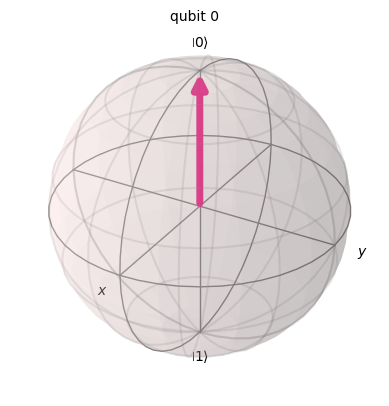

In [73]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute

qc = QuantumCircuit(1)

#qc.ry(pi/2, 0)   #B point to Y Axis
#qc.rx(pi/2, 0)   #B point to Y Axis
#qc.s(0)          #B point to Y Axis

qc.ry(pi/2, 0)   #D - correct
qc.s(0)          #D - correct
qc.rx(pi/2,0)    #D - correct

#qc.rx(pi/2, 0)   #C Generate 1
#qc.s(0)          #C Generate 1
#qc.ry(pi/2, 0)   #C Generate 1

#qc.s(0)          #A point to X Axis
#qc.ry(pi/2, 0)   #A point to X Axis
#qc.rx(pi/2, 0)   #A point to X Axis

simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_bloch_multivector(outputstate)

## QUESTION 9 - ASSESSMENT

What would be printed when calling `print(counts)` in the code below? A drawing of `qc` in its final state has been included\ 

```
from qiskit import QuantumCircuit, Aer, execute\
qasm_sim = Aer.get_backend('qasm_simulator')\

qc = QuantumCircuit(3)\
qc.x([0,1,2])\
qc.ccx(0,1,2)\
qc.measure_all()\

result = execute(qc, qasm_sim).result()\
counts = result.get_counts()\
print(counts)\
```

A. {'001': 1024}\
B. {'110': 1024}\
**C. {'011': 1024}** \
D. {'111': 1024}


{'011': 1024}


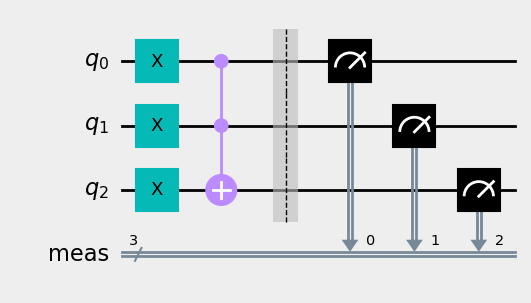

In [77]:
from qiskit import QuantumCircuit, Aer, execute
qasm_sim = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)
qc.x([0,1,2])
qc.ccx(0,1,2)
qc.measure_all()

result = execute(qc, qasm_sim).result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## In results { '011': 1024} first 0 point to q2 (is inverted)

## QUESTION 10 - ASSESSMENT

Given this code fragment, what is the probability that a measurement would result in |0> ? \

```
qc = QuantumCircuit(1)
qc.rx(3 * math.pi/4, 0)
````

A. 0.8536 \
**B. 0.1464** \
C. 0.5\
D. 1.0

### See QUESTION 2 - same response

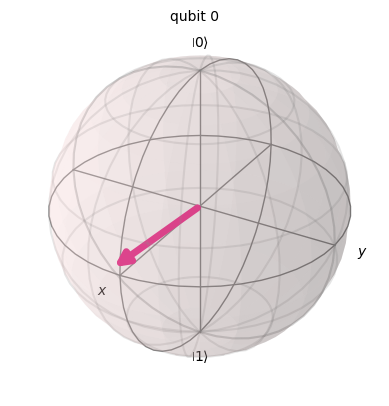

In [26]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute
from math import pi

qc = QuantumCircuit(1)
qc.rx(3*pi/4, 0)

simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_bloch_multivector(outputstate)

## QUESTION 11 - ASSESSMENT

Wich diagram will be produced by the circuit illustrated below? 


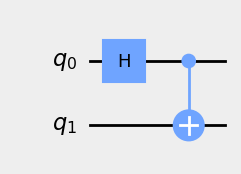

In [87]:
from qiskit import QuantumCircuit, Aer, execute
qasm_sim = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})


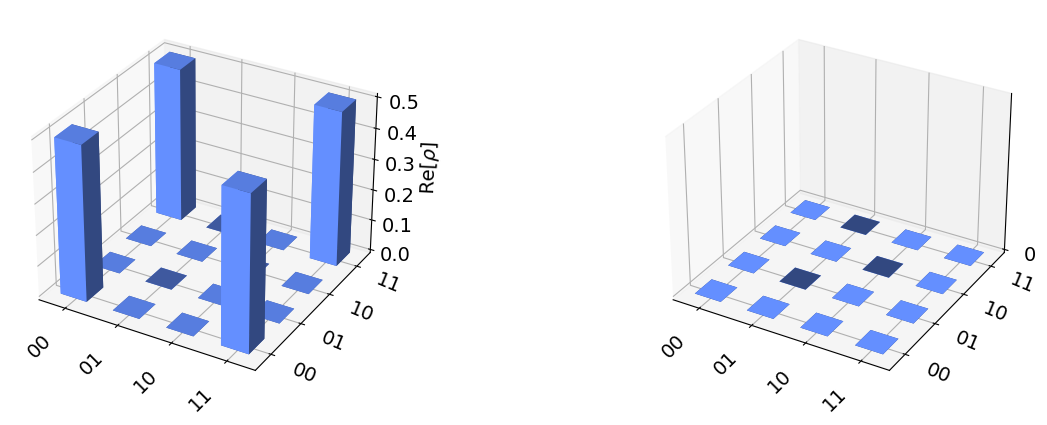

In [90]:
from qiskit.visualization import plot_state_city
from qiskit import QuantumCircuit, Aer, execute
qasm_sim = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
#qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})
simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_state_city(outputstate)

#### B is correct

## QUESTION 12 - ASSESSMENT

Wich coupling map represents a linear connection comprising 5 qubits?\

**A. `[[0,1],[1,2],[2,3],[3,4]]` - correct**\
B.`[[0,1],[0,2],[1,3],[4,0]]`\
C. `[[0,1],[0,3],[1,2],[4,1]]`\
D. `[[0,1],[0,2],[0,3],[0,4]]`\


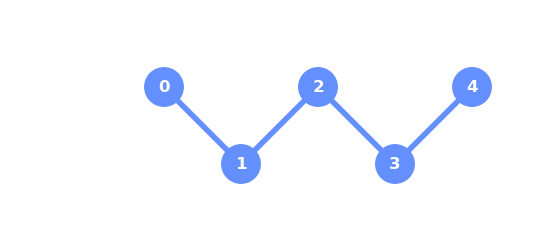

In [78]:
from qiskit.visualization import plot_coupling_map

num_qubits = 5

#coupling_map = [[0,1],[0,2],[1,3],[4,0]]  #B
#coupling_map = [[0,1],[0,3],[1,2],[4,1]]  #C
#coupling_map = [[0,1],[0,2],[0,3],[0,4]]  #D

#qubit_coordinates = [[0,1], [0, 2], [0, 3], [0, 4], [0,5]]  #Example1 - InLine
qubit_coordinates = [[0,1], [1, 2], [0, 3], [1, 4], [0,5]]   #Example2 - ZIGZAG
coupling_map = [[0, 1], [1, 2], [2, 3], [3, 4]] #A - CORRECT
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)


### Explanation 
### coupling_map is the index of each element conected. In this case 0 is connected with 1 (first [0, 1] on coupling_map), second element is conected to third one (second [1, 2] on coupling map, and so on
### qubit_coordinates has a colection oftwo values. First value means LEVEL and second element.
### For example 1, all the elements are poistioned on same level (0) and second point to element 1,2,3,4,5 (second value).
### For example2, first element is on level 0, second on level 1 (a little below) and element 2 return to zero, element 3 goes a little down again and element 4 return to zero. Is this case there is a "zigzag" of values (#Example2)


## QUESTION 13 - ASSESSMENT

Given this code fragment:\
```
from qiskit.tools.monitor import *\
provider = IBMQ.load.accounts()\
backend = provider.get_backend('ibmq_qasm_simulator')

qr = QuantumRegister(2)\
cr = ClassicalRegister(2)\
qc = QuantumCircuit(qr, cr)\
qc.h(qr[0])\
qc.cx(qr[0], qr[1])\
qc.measure(qr,cr)
```

A. provider.status() \
B. job_monitor()
C. job_monitor(backend) \
**D. backend.status()** \
E. job.status()

#### backend.status() is correct.. Not sure what is the second one (IBMQ.load.accounts() does not work localy). My best guest is that second option is job.status()

average_gate_fidelity() - Returns the average gate fidelity of a noisy Quantum channel
process_fidelity() - Returns the process fidelity of a noisy quantum channel
gate_error() - Returns the gate error of a noisy quantum channel
diamond_norm() - Returns the diamond norm input  of a quantum channel
state_fidelity(statea, stateb) - 
purity() - Return the purity of a quantum state
concurrence() - Returns the concurrence of a noisy quantum channel
entropy() - Returns the Von Neumann entropy of a noisy quantum channel
entanglement_of_formation() 
mutual_information() - Returns the mutual information of a bipartite state 


In [163]:
from qiskit.tools.monitor import *
from qiskit import Aer

#provider = IBMQ.load_accounts()
backend = Aer.get_backend('qasm_simulator')

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure(qr,cr)
#provider.status()
#job_monitor()  #Wrong
#job_monitor(backend) #wrong
backend.status() #OK - Works
#job.status() #Works but no information

## QUESTION 14 - ASSESSMENT

Wich Code fragment, when inserted into the code below, would create a circuit with a matrix **different** to the identity matrix?\

```
from qiskit import QuantumCircuit, Aer, execute \
from math import pi \
qc = QuantumCircuit(2) \
#insert code fragment here \
u_sim = Aer.get_backend('unitary_simulator') \
unitary = execute(qc, u_sim).result().get_unitary() \
print(unitary)\
```

A. wrong is identity matrix\
```
qc.crz(pi, 0,1)\
qc.crz(-pi, 0,1)
``` 

B. \
```
qc.cz(0,1)\
qc.cp(pi, 0, 1)
```

C. wrong identity matrix\
```
qc.cz(0,1)\
qc.cz(1, 0)
```

**D. correct\ **
```
qc.crz(pi, 0, 1)\ 
qc.cp(pi, 0, 1)
``` 


In [264]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
from numpy import round
qc = QuantumCircuit(2)

#qc.crz(pi, 0,1) #A is unitary
#qc.crz(-pi, 0,1) #A is unitary

#qc.cz(0,1)   #B is unitary
#qc.cp(pi, 0, 1) #B is unitary

#qc.cz(0,1)  #C  is unitary
#qc.cz(1, 0) #C  is unitary

qc.crz (pi, 0, 1) #D OK - not unitary
qc.cp (pi, 0, 1)  #D OK - not unitary

u_sim = Aer.get_backend('unitary_simulator')
unitary = execute(qc, u_sim).result().get_unitary()
print(round(unitary, 2) )

#simulator = Aer.get_backend('statevector_simulator') 
#job = execute(qc, simulator)
#result = job.result()
#outputstate = result.get_statevector(qc) 
#plot_bloch_multivector(outputstate)


[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.-1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.-1.j]]


## QUESTION 15 - ASSESSMENT

Which two of these can be used to initialize a vector of complex amplitudes on a quantum circuit (qc)?\
A. `qc.initialize ([0, 1, 1], [0, 1])`\
**B. `qc.initialize ([1,0,0,0], [0, 1])`** \
**C. `qc.initialize([0, 1], 0)`** \
D. `qc.initialize ([0,0, 1, 1,0])`\
**E. `qc.initialize ([1,0,0,0])`** \

In [265]:
from qiskit import QuantumCircuit, Aer, execute
from math import sqrt
qc = QuantumCircuit(2)

#qc.initialize ([0, 1, 1], [0, 1])  #A wrong
#qc.initialize ([1,0,0,0], [0, 1])  #B Correct
#qc.initialize([0, 1], 0) #C Correct
#qc.initialize ([0,0, 1, 1,0]) #D Wrong
#qc.initialize ([1,0,0,0]) #E Correct

simulator = Aer.get_backend('statevector_simulator') 
result = execute(qc, simulator).result() 
statevector = result.get_statevector() 
print(statevector)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


## QUESTION 16 - ASSESSMENT

Which code fragment could be used to produce this image?

**A. plot_histogram (counts, legend=['All H gates'])** 

B. plot_bar_chart (counts, legend= ['All H gates'])

C. plot_bar_graph (counts, legend= ['All H gates'])

D. plot_bar_chart (counts, title= ['All H gates'])

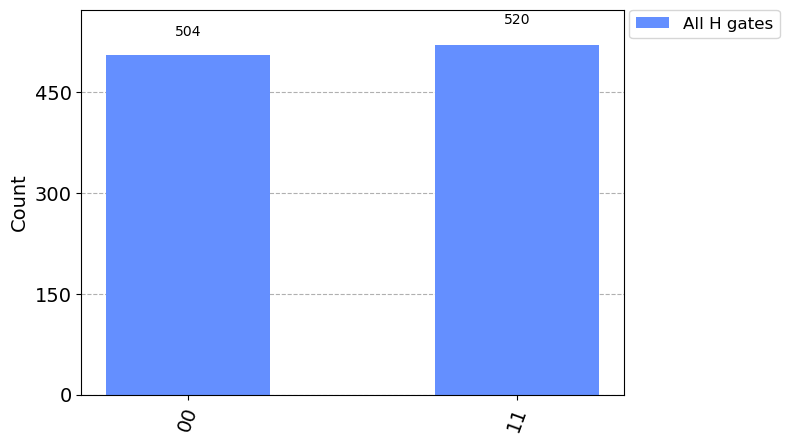

In [200]:
from qiskit.visualization import plot_histogram

plot_histogram (counts, legend=['All H gates']) #A
#plot_bar_chart (counts, legend=['All H gates']) #B
#plot_bar_graph (counts, legend=['All H gates']) #C
#plot_bar_chart (counts, title=['All H gates']) #D


## QUESTION 17 - ASSESSMENT

Which parameter of the execute function can be used to set how much optimization to perform on the circuits?\

A circuit_level\
B. optimize_backend\
**C. optimization_level - Correct** \
D. circuit_optimization


## QUESTION 18 - ASSESSMENT

Which code fragment would produce the illustrated circuit?

**A. correct\
qr = QuantumRegister (2, 'q')\
a = QuantumRegister (1,'a')\
cr = ClassicalRegister (3, 'c')\
qc = QuantumCircuit (qr, a, cr)\
qc.h(qr[0:2])\
qc.x (a[0])**

B.\ 
qr = QReg (2, 'q')\
a = QReg (1, 'a')\
cr = CReg (3, 'c')\
qc = QuantumCircuit (qr, a, cr)\
qc.h (qr [0:2])\
qc.x (a [0])\

C. \
qr = QuantumRegister (2, 'q')\
a = QuantumRegister (1, 'a')\
cr = ClassicalRegister (3, 'c')\
qc = QuantumCircuit (cr, a, qr)\
qc.h (qr [0:2])\
qc.x (a [0])\

D. \
qr = QuantumRegister (2, 'q') \
a = QuantumRegister (1,'a' ) \
cr = ClassicalRegister (3, 'c') \
qc = QuantumCircuit (qr, a, cr) \
qc.h ([0:1]) \
qc.x (a [0]) \

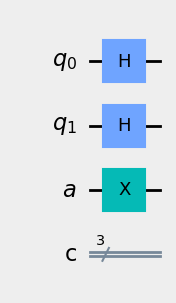

In [209]:
from qiskit import QuantumCircuit, Aer, execute
qasm_sim = Aer.get_backend('qasm_simulator')

qr = QuantumRegister (2, 'q')   #A
a = QuantumRegister (1,'a')     #A
cr = ClassicalRegister (3, 'c') #A
qc = QuantumCircuit (qr, a, cr) #A
qc.h(qr [0:2]) #A
qc.x (a [0]) #A

#qr = QuantumRegister (2, 'q')  #C
#a = QuantumRegister (1, 'a')   #C
#cr = ClassicalRegister (3, 'c') #C
#qc = QuantumCircuit (cr, a, qr) #C
#qc.h (qr [0:2])
#qc.x (a [0])

#qr = QuantumRegister (2, 'q') #D
#a = QuantumRegister (1,'a' )  #D
#cr = ClassicalRegister (3, 'c') #D
#qc = QuantumCircuit (qr, a, cr) #D
#qc.h(qr[0:1]) #D
#qc.x (a[0]) #D

qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 19 - ASSESSMENT

When creating a quantum circuit (qc) using Qiskit, which would you use to print out the QASM syntax of the code?\
A. print (qc.from_qasm_str ())\
B. print (qc.toQasm () )\
C. print (qc.to_qasm_str () )\
**D. print (qc.qasm () )** \

In [213]:
from qiskit import QuantumCircuit, Aer, execute
qasm_sim = Aer.get_backend('qasm_simulator')

qr = QuantumRegister (2, 'q')   #A
a = QuantumRegister (1,'a')     #A
cr = ClassicalRegister (3, 'c') #A
qc = QuantumCircuit (qr, a, cr) #A

#print (qc.from_gasm_str())
#print (qc.toQasm())
#print (qc.to_qasm_str())
print (qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
qreg a[1];
creg c[3];



## QUESTION 20 - ASSESSMENT

Which two combinations of Pauli gates have the same effect as the Identity gate (up to a global phase, and operations are right-to-left?\
                                                                                 
**A. XYZ - correct** \                                                                          
B. YZ  - wrong 1\                                                                           
**C. XX - correct** \                                                                             
D. XZ  - wrong 1\                                                                         
**E. XY - seems to have 3 right** 

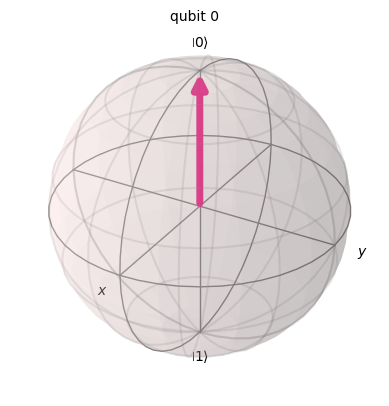

In [41]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute
from math import pi

qc = QuantumCircuit(1)

#qc.z(0)  #A - Correct
#qc.y(0)  #A
#qc.x(0)  #A

#qc.z(0) #B - wrong 1
#qc.y(0) #B

#qc.x(0) #C - correct but is not Pauli Gates
#qc.x(0) #C

#qc.z(0) #D - wrong 1
#qc.x(0) #D

#qc.y(0) #E - seems correct
#qc.x(0) #E

simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_bloch_multivector(outputstate)

## QUESTION 21 - ASSESSMENT

Given this code fragment, what is the probability that a measurement would result in |0> ?\

```qc = QuantumCircuit (1) \
qc.h (0) \
qc.s (0) \
qc.h (0) \
```
A. 0.8536\
B. 1.0\
**C. 0.5** \
D. 0.1464\

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import math
from qiskit import QuantumCircuit, execute
from qiskit import Aer, BasicAer

qc = QuantumCircuit(1) 
qc.h(0)
qc.s(0)    #AFTER S IN HADAMARD STATE, DOES NOT RETURN TO ORIGINAL STATE
#qc.t(0)   #AFTER T IN HADAMARD STATE, WALK THROUGH SURFACE WITH NO APPARENT ORDER
qc.h(0)   

simulator = BasicAer.get_backend('statevector_simulator')
result = execute (qc, simulator).result ()
counts = result.get_counts (qc)
print (counts)

{'0': 0.853553390593274, '1': 0.146446609406726}


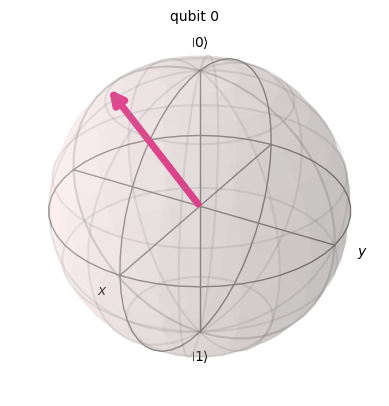

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute
from math import pi
from qiskit import QuantumCircuit, Aer, execute

qasm_sim = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(1)
qc.h(0)
#qc.s(0)
qc.t(0)
qc.h(0)
#qc.measure_all()

result = execute(qc, qasm_sim).result()
#counts = result.get_counts()
#print(counts)

simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_bloch_multivector(outputstate)

## QUESTION 22 - ASSESSMENT

Assuming that this sample code is added at each barrier in the QuantumCircuit, sort the Q-spheres in the order that they will display.\
```
result = execute(qc, simulator).result () \
statevector = result.get_statevector (qc) \
plot_state_qsphere (statevector) \
```
Circuit:\

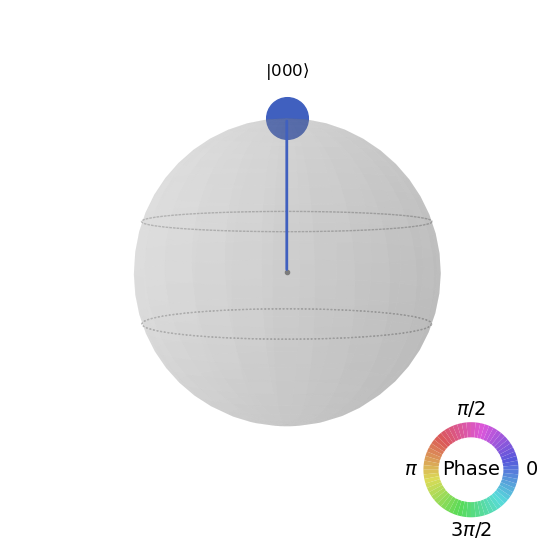

In [87]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import DensityMatrix
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere




qc = QuantumCircuit(3)
qc.x(1)   #B
#matrix = DensityMatrix(qc)
#plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

qc.barrier()
qc.h([0,1,2]) #C
#matrix = DensityMatrix(qc)
#plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

qc.barrier()
qc.z(1)  #D
#matrix = DensityMatrix(qc)
#plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

qc.barrier()
qc.h([0,1,2]) #A

qasm_sim = Aer.get_backend('qasm_simulator')
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

#qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

### So correct response is B,C,D,A

## QUESTION 23 - ASSESSMENT

Which code fragment defines vector such that the code below will show this output?\
```
insert code fragment here\
plot_bloch_vector (vector)\
```
Output:

**A. `vector = [1/sqrt(2), -1/sqrt(2), 0]` **\
B. `vector = [1/sqrt(2), -1/sqrt(2), -1]`\
C. `vector = [1, -1, 0]`\
D. `vector = [pi/2, -pi/4, 0]` \

array of three elements where [x, y, z] (Cartesian) or [r, theta, phi] (spherical in radians) theta is inclination angle from +z direction <phi> is azimuth from +x direction
![image](Bloch_sphere.svg.png) 
    
**array of three elements where [<\x>\, <\y>\, <\z>\] (Cartesian) or [<\r>\, <\theta>\, <\phi>\] (spherical in radians) <\theta>\ is inclination angle from +z direction <\phi>\ is azimuth from +x direction

# [𝜓,𝛩,𝜑 ] = [r, Z, X] - r lenght arrow, Z= rotation on Z, X=rotation on X
# [X,Y,Z] = X,Y,Z should be 1

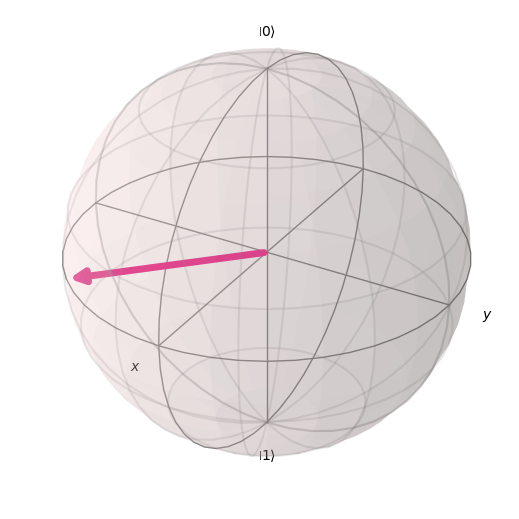

In [88]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi, sqrt

#outputstate = [pi/2, -pi/4, 0] #D
#outputstate = [1, -1, 0] #C
#outputstate = [1/sqrt(2), -1/sqrt(2), -1] #B
outputstate = [1/sqrt(2), -1/sqrt(2), 0] #A

#outputstate = [1, pi/8, 0] #TESTS

plot_bloch_vector(outputstate)

## QUESTION 24 - ASSESSMENT

Given this code fragment:\

```qc = QuantumCircuit(2, 2) \
qc.h(0) \
qc.x(1) \
qc.measure ([0,1], [0,1]) \
simulator = BasicAer.get_backend ( 'gasm simulator") \
result = execute(qc, simulator, shots=1000) .result () \
counts = result.get_counts (qc) \
print (counts) \
```

Which output fits most closely with the measurement probability distribution?

**A. ('10': 509, '11': 491) - correct**\
B. {'01': 509, '11': 491}\
C. ('01': 509, 10': 491)\
D. ('00': 509, "01': 491)\

In [318]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.x(1)
qc.measure ([0,1], [0,1])
simulator = Aer.get_backend('qasm_simulator')
result = execute (qc, simulator, shots=1000) .result ()
counts = result.get_counts (qc)
print (counts)

{'10': 497, '11': 503}


## QUESTION 25 - ASSESSMENT

Using the imports below:\
`from qiskit.visualization import plot bloch multivector 
from numpy import sqrt, pi\
  Insert code fragment here\
`
Which code fragment, when added to the code above, will produce this output?\

A.`vector = [1/sqrt (2), 0, 0,1/sqrt (2) ] \
plot_bloch_multivector (vector)`

**B. `vector = [l/sqrt (2), 0, 1/sqrt (2), 0] \
plot_bloch_multivector (vector)`**

C. `vector = [1/sqrt (2), 01+ [1/sqrt (2) ,1/sqrt (2) ] \
plot_bloch_multivector (vector)`

D. `vector = ([1/sqrt (2), 01, [1/sqrt (2), 1/ sqrt (2) ]) \
plot_bloch_multivector (vector)`

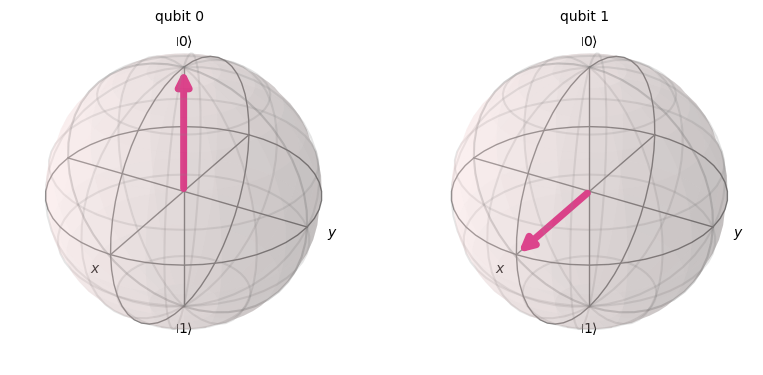

In [328]:
from qiskit.visualization import plot_bloch_multivector 
from numpy import sqrt, pi

#vector = [1/sqrt (2), 0, 0,1/sqrt (2) ] #A - wrong (but VALID)
vector = [1/sqrt (2), 0, 1/sqrt (2), 0]  #B - CORRECT
#vector = [1/sqrt (2), 0]+[1/sqrt (2) ,1/sqrt (2)] #C - wrong (BUT VALID)
#vector = ([1/sqrt (2), 0], [1/sqrt (2), 1/sqrt (2)]) #D - wrong
plot_bloch_multivector (vector)

## QUESTION 26 - ASSESSMENT

Which code fragment will produce a maximally entangled, or Bell, state?

A. bell = QuantumCircuit (2) \
bell.cx (0, 1) bell.h (0)

B. bell = QuantumCircuit (2) \
bell.h (0) \
bell.h (0)

**C. bell = QuantumCircuit (2) \
bell.h (0) \
bell.cx (0, 1)** \

D. bell = QuantumCircuit (2) \
bell.h (0) \
bell.cz (0, 1)

### SEE QUESTION 5

## QUESTION 27 - ASSESSMENT

Which line of code will return a random unitary Operator result such as that shown below?
```
Operator ([[ 0.23654083-0.35560178, -0.53587187+0.72831116j], \
[-0.05122362+0.90275797j, -0.04435338+0.42477873j]], input dims=(2,), output dims=(2,)) \
```
A. `random_unitary(4)`\
B. `random_statevector(2)`\
C. `random_statevector('unitary'=2)`\
**D. `random_unitary(2)`**

In [279]:
from qiskit.quantum_info import random_statevector,random_unitary 
from numpy import sqrt, pi

#print(random_unitary(4)) #A
#print(random_statevector(2)) #B
#print(random_statevector('unitary'=2)) #C
print(random_unitary(2)) #D

Operator([[ 0.52870358+0.62653781j,  0.29136746+0.4929786j ],
          [-0.37718432-0.43087688j,  0.42985451+0.69807034j]],
         input_dims=(2,), output_dims=(2,))


## QUESTION 28 - ASSESSMENT

Given this code fragment:\
```
qc = QuantumCircuit (1) \
qc.x (0) \
qc.h (0) \
simulator = Aer.get backend ('unitary simulator') \
job = execute (qc, simulator) \
result = job.result () \
outputstate = result.get_unitary (qc, 1) \
print (outputstate) \
```
Which is closest to the output?

**A. ```[[0.71-01 0.71+0.j]\
[-0.71+0.j 0.71+0.j]]```

B. ```[[0.5-0÷ 0.5+0.j]\
[-0.5+0. 0.5+0.j]]```

C. `[0.71+0. 0.71+0.j -0.71+0.j 0.71+0.j]`

D. `[0.5-03 0.570.3 - 0.570.j 0.5+0.j]`

In [92]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi

qc = QuantumCircuit(1)
#qc.x(0)
qc.h(0)
#qc.x(0)
simulator = Aer.get_backend('unitary_simulator')
job = execute(qc, simulator)
result = job.result ()
outputstate = result.get_unitary (qc, 1)
print(outputstate)

simulator = Aer.get_backend('statevector_simulator') 
result = execute(qc, simulator).result() 
statevector = result.get_statevector() 
print(statevector)

Operator([[ 0.7+0.j,  0.7-0.j],
          [ 0.7+0.j, -0.7+0.j]],
         input_dims=(2,), output_dims=(2,))
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


qc = QuantumCircuit(1)\
no other instructions\
[[1.+0.j, 0.+0.j],\
[0.+0.j, 1.+0.j]]

qc = QuantumCircuit(1)\
qc.x(0)\
[[0.+0.j, 1.+0.j],\
[1.+0.j, 0.+0.j]],
 
qc = QuantumCircuit(1)\
qc.x(0)\
qc.h(0)\
[[ 0.7+0.j,  0.7+0.j],\
[-0.7-0.j,  0.7+0.j]]

qc = QuantumCircuit(1)\
qc.h(0)\
[[ 0.7+0.j,  0.7-0.j],\
[ 0.7+0.j, -0.7+0.j]]

qc = QuantumCircuit(1)\
qc.h(0)\
qc.x(0)\
[[ 0.7+0.j, -0.7+0.j],\
[ 0.7+0.j,  0.7+0.j]]

qc = QuantumCircuit(1)\
qc.x(0)\
qc.h(0)\
qc.x(0)\
[[-0.7+0.j,  0.7-0.j],\
[ 0.7+0.j,  0.7+0.j]]

## QUESTION 29 - ASSESSMENT

Which is a valid method of the QuantumCircuit class?\
**A..cs ()** \
B..ct ()\
C. .cexchange ()\
**D. .cswap ()** 

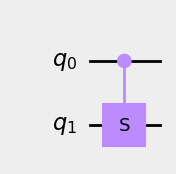

In [71]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi

qc = QuantumCircuit(2)
qc.cs(0,1) #A - OK
#qc.ct(0) #B
#qc.cexchange(0)
#qc.cswap(0,1,2) - OK (need 3 parameters)

qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 30 - ASSESSMENT

Given the following code:

```
gc = QuantumCircuit (1) \
qc.h (0) \
Insert code fragment here \
print (unitary)
```

Which two code fragments would you insert above to print the below output ?\
```
[ 0.7071+0.Oe+00j 0.7071-8.65956e-17j] \
[ 0.7071+0.0e+00j -0.70710678+8.65956e-17j]
```

A. - OK
```
result = execute (qc, simulator).result () \
unitary = result.get_unitary (qc)
``` 

**B.- OK**
```
simulator = BasicAer.get_backend ('unitary_simulator') \
result = execute (qc, simulator).result () \
unitary = result.get_unitary (qc)
``` 

C. 
```
simulator = BasicAer.get_backend ('unitary_simulator') \
unitary = execute (qc, simulator).get_unitary (qc)
``` 

D. 
```
simulator = Aer.get_backend ('statevector_simulator") \
result = execute (qc, simulator).result () \
unitary = result.get_matrix_result (qc)
``` 

E. 
```
simulator = BasicAer.get_backend ('statevector_simulator') \
result = execute (qc, simulator).result () \
unitary = result.get_unitary (qc)
``` 

In [292]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer, BasicAer
from qiskit import execute
from math import pi

qc = QuantumCircuit (1)
qc.h(0)

#result = execute (qc, simulator).result ()   #A - ERROR
#unitary = result.get_unitary (qc) #A - ERROR

simulator = BasicAer.get_backend('unitary_simulator') #B.- OK
result = execute (qc, simulator).result () #B - OK
unitary = result.get_unitary (qc) #B - OK

#simulator = BasicAer.get_backend ('unitary_simulator') #C - wrong
#unitary = execute(qc, simulator).get_unitary(qc) #C - wrong

#simulator = Aer.get_backend ('statevector_simulator') #D wrong
#result = execute (qc, simulator).result () #D wrong
#unitary = result.get_matrix_result (qc) #D wrong

#simulator = BasicAer.get_backend ('statevector_simulator') #E wrong
#result = execute (qc, simulator).result () #E wrong
#unitary = result.get_unitary (qc) #E wrong

print (unitary)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


## QUESTION 31 - ASSESSMENT

Which one option would place a Toffoli gate as illustrated in the quantum circuit below?\
`qc = QuantumCircuit (3)`

**A. `qc.ccx (0,2, 1)`** \
B. `qc.tx ([0,1], [2])`\
C. `qc.toffoli ([0,2], [1])`\
D. `qc.toffoli (qc)`\

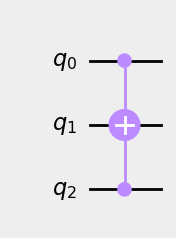

In [382]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi

qc = QuantumCircuit(3)
qc.ccx (0,2, 1)   #A - OK
#qc.tx ([0,1], [2]) #B - wrong
#qc.toffoli ([0,2], [1]) #C - Wrong
#qc.toffoli (qc)  #D wrong

qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 32 - ASSESSMENT

Which method returns a UnitarySimulatory object?\
A. `BasicAer.backends (type = 'unitary_simulator')`\
B. `BasicAer.get('unitary_simulator')`\
C. `BasicAer.get_unitary ()`\
**D. `BasicAer.get_backend ('unitary_simulator')`**

In [390]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi

#BasicAer.backends (type = 'unitary simulator') #A - wrong
#BasicAer.get('unitary simulator') #B - wrong
#BasicAer.get_unitary () #C - wrong
BasicAer.get_backend ('unitary_simulator') #D - Correct

<UnitarySimulatorPy('unitary_simulator')>

## QUESTION 33 - ASSESSMENT

Which code snippet would print the version of Qiskit installed?\

A. `import qiskit.tools.jupyter\
%version_table`

B. `import giskit\
qiskit.print_version ()`

**C. `import qiskit\
print (qiskit.__qiskit_version__)`**

D. `from qiskit import IBMQ\
print (IBMQ.get_all_info())`

In [398]:
#import qiskit.tools.jupyter - #A wrong
#%version_table

#import qiskit
#qiskit.print_version () #B wrong

import qiskit   #C - OK
print (qiskit.__qiskit_version__) #C.- OK

#from qiskit import IBMQ #D - wrong
#print (IBMQ.get_all_info()) #D - wrong

{'qiskit-terra': '0.24.0', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


## QUESTION 34 - ASSESSMENT

Given the following code:\

```
qc = QuantumCircuit (3, 3) \
qc.h (0) \
qc.cx (0,1) \
gc.cx (0,2) \
qc.h (2) \
qc.cx (2, 0)
```

What is the depth of the circuit?\
**A. 5**\
B. 6\
C. 3\
D. 4

In [399]:
qc = QuantumCircuit (3, 3)
qc.h (0)
qc.cx (0,1)
qc.cx (0,2)
qc.h (2)
qc.cx (2, 0)
qc.depth()


5

## QUESTION 35 - ASSESSMENT

Which combination of Pauli gates is true?\
A. Y=HZH\
B. Z=HYH\
**C. X=HZH**\
D. X=HXH\

#### Z = HXH
#### X = HZH
#### -Y = HYH

## QUESTION 36 - ASSESSMENT

Given the device details below from &qiskit backend overview:\
**The Avg CX Err is the average error of the 2-qubit CX gate.**\
**The Avg Meas Err is the average measurement error.**

![backend](backend_overview.png)
Which device would you send your job to, if you wanted the results as soon as possible?\
A. ibmq_16_melbourne\
B. ibmq_vigo\
C. ibmg_valencia\
**D. ibmq_ourense**\

![desc_backend](desc_backend.png)

## QUESTION 37 - ASSESSMENT

Which two options would place a barrier across the first and last qubits only in the QuantumCircuit below?\
`qc = QuantumCircuit (3)`\

**A. `qc.barrier ([0,2])`**

B. `qc.barrier ([0,,21)`

C. `qc.barrier (1,-1,1)`

**D. `qc.barrier (0, 2)`**

E. `qc.barrier (0)+qc.barrier (2)`

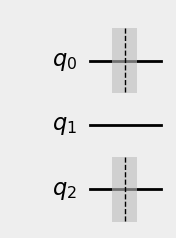

In [406]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi

qc = QuantumCircuit(3)

qc.barrier ([0,2]) #A - OK
#qc.barrier ([0,,2]) #B - wrong
#qc.barrier (1,-1,1) #C - wrong
#qc.barrier (0, 2)  #D - ok
#qc.barrier (0)+qc.barrier (2) - E wrong

qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 38 - ASSESSMENT

Which code segment produces this circuit?\

A. - wrong
```
qc = (QuantumRegister (3) ) \
qc.h ([0,1,2]) \
qc.barrier () \
qc.measure ([0,1,2], range (3) )
```

**B. - OK**
```
qc = QuantumCircuit (3, 3) \
qc.h([0,1,2]) \
qc.barrier () \
qc.measure ([0,1,2],range (3) )
``` 

C. 
```
qc = QuantumCircuit (3) \
qc.h ([0,1,2]) \
qc.barrier () \
qc.measure ([0,1,2], range (3) )
```

D. 
```
qc = (QuantumRegister (3), ClassicalRegister (1)) \
qc.h ([0,1,2]) \
qc.barrier () \
qc. measure ([0,1,2], range (1) )
```

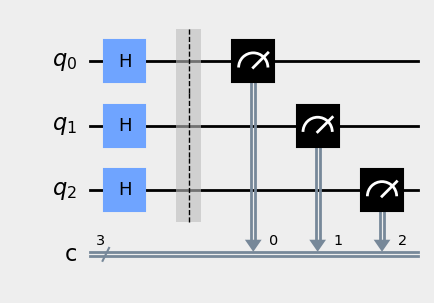

In [411]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi

#qc = (QuantumRegister (3) ) #A - wrong
#qc.h ([0,1,2]) #A - wrong
#qc.barrier () #A - wrong
#qc.measure ([0,1,2], range (3) ) #A - wrong

qc = QuantumCircuit (3, 3) #B - ok
qc.h([0,1,2]) #B - ok
qc.barrier () #B - ok
qc.measure ([0,1,2],range (3) ) #B - ok

#qc = QuantumCircuit (3) #C - wrong
#qc.h ([0,1,2]) #C - wrong
#qc.barrier () #C - wrong
#qc.measure ([0,1,2], range (3) ) #C - wrong

#qc = (QuantumRegister (3), ClassicalRegister (1)) #D - wrong
#qc.h ([0,1,2]) #D - wrong
#qc.barrier () #D - wrong
#qc. measure ([0,1,2], range (1) ) #D - wrong

qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 39 - ASSESSMENT

Given this code:\

```
from qiskit import QuantumCircuit\
qc = QuantumCircuit (3)\
qc.ccx (0,1,2)
```

Which line would draw the circuit as single and two-qubit gates only?\

`gc = QuantumCircuit (num qubits)`

A. `qc.basis_gates().draw()`\
B. `qc.gates().draw()`\
C. `qc.draw()`\ - wrong but not decompose\
**D. `qc.decompose().draw ()`  - decompose creates a circuit with simple gates**

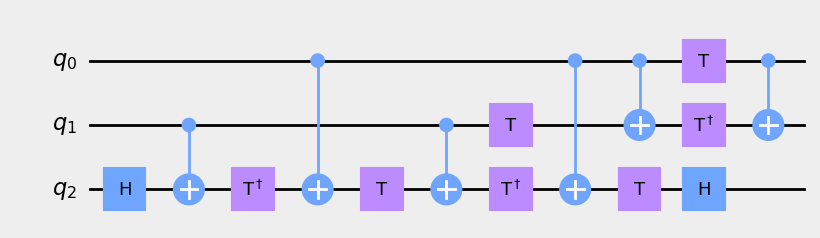

In [295]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi

qc = QuantumCircuit (3)
qc.ccx (0,1,2)

#qc.basis_gates().draw() #A - wrong
#qc.gates().draw() #B wrong
#qc.draw() #C - wrong
qc.decompose().draw (output='mpl', style={'backgroundcolor': '#EEEEEE'}) #D - OK, BUT DECOMPOSE

## QUESTION 40 - ASSESSMENT

Which option would return this list of backends?\
```
[<QasmSimulatorPy ('gasm simulator') from BasicAer () >, \
<StatevectorSimulator y ('statevector simulator') from BasicAer () > , \
<UnitarySimulatorPy 'unitary simulator') from BasicAer () >]
```

**A. `BasicAer.backends ()`** \
B. `backend.list ()` \
C. `backend (source = 'BasicAer')` \
D. `BasicAer.list_backends ()` \

In [423]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer,BasicAer
from qiskit import execute
from math import pi


BasicAer.backends() #A- ok 
#backend.list ()  #B - wrong
#backend(source = 'BasicAer') #C - wrong
#BasicAer.list_backends () #D - wrong

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

## QUESTION 41 - ASSESSMENT

```
from qiskit import QuantumCircuit, Aer, execute \
qc = QuantumCircuit (1) \
qc.h (0) \
qc.t (0) \
simulator = Aer.get backend ('statevector simulator') \
result = execute (qc, simulator).result () \
   #Insert code fragment here
```

Which code fragment, when added to the code above, will produce this output?\

A. 
```
from qiskit.visualization import plot_bloch_vector \
plot_bloch_vector(result.get_statevector() ) 
```

B. 
```
from giskit.visualization import plot_histogram\
plot_histogram(result.get_counts() )
```

C. `print(result.get_statevector () )` \

**D. - OK**
```
from qiskit.visualization import plot_bloch_multivector \
plot_bloch_multivector(result.get_statevector())
```

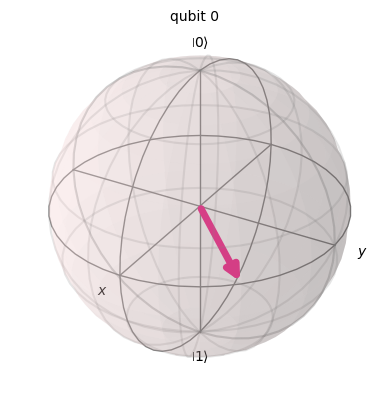

In [299]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit (1)
qc.h (0)
qc.t (0)
simulator = Aer.get_backend ('statevector_simulator')
result = execute(qc, simulator).result ()

#plot_bloch_vector(result.get_statevector()) #A wrong

#plot_histogram(result.get_counts () ) #B wrong

#print (result.get_statevector()) #C Wrong

plot_bloch_multivector(result.get_statevector()) # D - Correct


## QUESTION 42 - ASSESSMENT

Which statement will create a quantum circuit with one quantum bit and one classical bit?\

A. 
```
   QuantumCircuit ( \
   QuantumRegister (1, 'grO'), \
   QuantumRegister (1, 'cr1') )
```

B. `QuantumCircuit ([1, 1])`

C. `QuantumCircuit (1)`

**D. `QuantumCircuit (1, 1)`**

## QUESTION 43 - ASSESSMENT

Which of the count results would be expected from this circuit?\
```
qc = QuantumCircuit (2, 2) \
qc.h (0) \
qc.× (1) \
qc.measure ([0,11, [0,1]) \
simulator = Aer.get backend ( 'gasm simulator')
```

**A. {'10': 503, '11': 521}** \
B. {'00': 503, '01': 521}\
C. {00': 503, '11': 521}\
D. {01': 503, '10°: 521}\

In [451]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer, BasicAer
from qiskit import execute
from math import pi

qc = QuantumCircuit (2, 2)
qc.h(0)
qc.x(1)
qc.measure([0,1], [0,1])
simulator = Aer.get_backend ('qasm_simulator')
result = execute(qc,simulator).result ()
counts = result.get_counts (qc)
print (counts)

{'11': 513, '10': 511}


## QUESTION 44 - ASSESSMENT

From an initial state |0>, which code fragment would produce the state represented by the Bloch sphere below?\

A. qc.z(0)\
B. qc.h(0)\
C. qc.ry(math.pi/2,0)\
**D. qc.y(0)** \

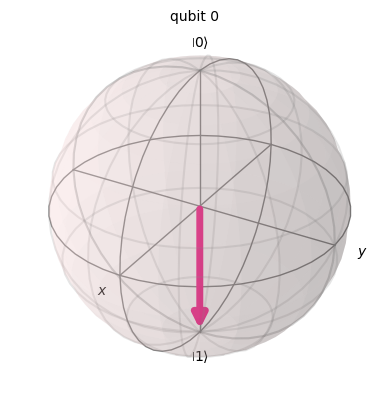

In [457]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from math import pi

qc = QuantumCircuit (1)

#qc.z(0) #A - wrong
#qc.h(0) #B - wrong
#qc.ry(pi/2,0) #C - wrong
qc.y(0) #D - OK


simulator = Aer.get_backend ('statevector_simulator')
result = execute(qc, simulator).result ()
plot_bloch_multivector(result.get_statevector ())

## QUESTION 45 - ASSESSMENT

Given this code fragment, what is the probability that a measurement would result in |0> ?\

```
qc = QuantumCircuit (1)
qc.z(0)
```

A. 0.1464\
B. 0.5\
C. 0.8536\
**D. 1.0**

In [300]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from math import pi

qc = QuantumCircuit (1)
qc.z(0)

#simulator = Aer.get_backend ('statevector_simulator')
#result = execute(qc, simulator).result ()
#plot_bloch_multivector(result.get_statevector ())
simulator = Aer.get_backend('statevector_simulator')  # get simulator
result = execute(qc, simulator, shots=1000).result() # 1000 shots
counts = result.get_counts(qc)
print(counts)

{'0': 1.0}


## QUESTION 46 - ASSESSMENT

T-gate is a Qiskit phase gate with what value of the phase parameter?\

A. PI\
B. PI/2\
**C. PI/4**\
D. 2PI

#### See Question 7

## QUESTION 47 - ASSESSMENT

Which line of code, if run directly after the code below, would raise an error?\

```
from giskit import QuantumCircuit \
qc = QuantumCircuit (2) \
gc.h (0) \
qo.cx (0,1) \
#insert code here
```

A. `qc.draw ('latex_source")` \
B. `qc.draw ('mpl')` \
C. `qc.draw ('text")` \
**`D. qc.draw ( 'png' )`**

In [602]:
from qiskit import QuantumCircuit
qc = QuantumCircuit (2)
gc.h (0)
qc.cx (0,1)

#qc.draw ('latex_source') #A - Works
#qc.draw ('mpl')  #B - WORKS
#qc.draw ('text') #C - WORKS
qc.draw ('png') #D- ERROR

VisualizationError: 'Invalid output type png selected. The only valid choices are text, latex, latex_source, and mpl'

## QUESTION 48 - ASSESSMENT

Which code segment produces a circuit matching this diagram?\

A. - wrong
```
qr = QuantumRegister (3, 'qubit') \
qc = QuantumCircuit (qr, ClassicalRegister (3, name='classicalbit')) \
qc. measure (3,3)
```

B. - wrong
```
qr = QuantumRegister (3) \
qc = QuantumCircuit (qr, ClassicalRegister (3)) \
qc.h (qr) \
qc. measure ([0,1,2], [0,1,2])
```

C. - wrong
```
qr = QuantumRegister (3, 'qubit') \
cr = ClassicalRegister (3, name='classicalbit')) \
qc. measure ([0,1,2], [0,1,2])
```

**D. - OK**
```
qr = QuantumRegister (3, 'qubit') \
qc = QuantumCircuit (qr, ClassicalRegister (3, name='classicalbit")) \
gc.h (qr) \
qc.measure ([0,1,2], [0,1,2])
```

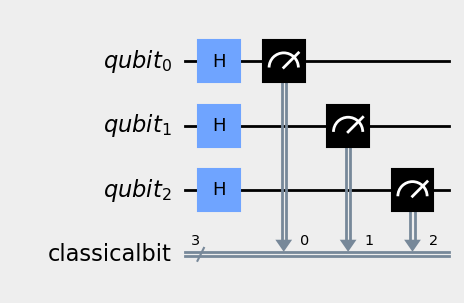

In [488]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi

#qr = QuantumRegister (3, 'qubit')  #A - wrong
#qc = QuantumCircuit (qr, ClassicalRegister (3, name='classicalbit')) #A - wrong
#qc.measure(3,3) #A - wrong
 
#qr = QuantumRegister (3)    #B - ok but wrong names
#qc = QuantumCircuit (qr, ClassicalRegister (3)) #B - ok but wrong names
#qc.h (qr) #B - ok but wrong names
#qc. measure ([0,1,2], [0,1,2]) #B - ok but wrong names

#qr = QuantumRegister (3, 'qubit')  #D - wrong
#cr = ClassicalRegister(3, name='classicalbit')) #D - wrong
#qc. measure ([0,1,2], [0,1,2]) #D - wrong

qr = QuantumRegister (3, 'qubit')    #D - OK
qc = QuantumCircuit (qr, ClassicalRegister (3, name='classicalbit')) #D - OK
qc.h (qr) #D - OK
qc.measure ([0,1,2], [0,1,2]) #D - OK
                                            
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 49 - ASSESSMENT

Which code fragment, when inserted into the code below, will create the circuit shown in the output?\

```from giskit import QuantumCircuit \
qc = QuantumCircuit (4) \
  #Insert code fragment here \
qc.draw ()
```

Output of qc.draw () :\

A. - wrong
```
qc.h (3) \
qc.ccx (3, 2, 1)
```

B. - wrong
```
qc.h (0) \
qc.cx (0, 1) \
qc.cx (1, 2)
```

C. - wrong
```
qc. h (0) \
qc.cx (0, 1) \
qc.cx (0, 2)
```

**D. - OK**
```
qc.h(0) \
qc.ccx (0, 1, 2)
```

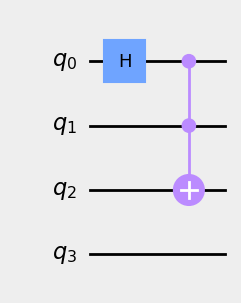

In [493]:
from qiskit import QuantumCircuit
qc = QuantumCircuit (4)

#qc.h (3)   #A - wrong circuit
#qc.ccx (3, 2, 1) #A - wrong circuit
 
#qc.h(0) #B - wrong circuit
#qc.cx(0, 1) #B - wrong circuit
#qc.cx(1, 2)  #B - wrong circuit

#qc.h(0) #C - wrong circuit
#qc.cx (0, 1) #C - wrong circuit
#qc.cx (0, 2) #C - wrong circuit

qc.h(0)  #D - OK
qc.ccx (0, 1, 2) #D - OK

qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 50 - ASSESSMENT

How is the Pauli X gate often described?\
A. Control-Flip\
**B. Bit-Flip**\
C. Phase-Flip\
D. Reverse-Flip\

### OTHER COMMON NAMES
#### Pauli X, NOT, bit flip
#### Pauli Z, phase flip
#### Phase gate S,   square root of Z
#### Square root of X, square root of NOT
#### Hadamard, Walsh-Hadamard
#### Controlled NOT,  controlled-X,  controlled-bit flip,  reversible exclusive OR,  Feynman
#### Anticontrolled-NOT, anticontrolled-X, zero control, control-on-0-NOT, reversible exclusive NOR
#### Controlled-Z, controlled sign flip, controlled phase flip
#### 

## QUESTION 51 - ASSESSMENT

Which code fragment would produce this circuit illustrated below?\

A. 
```
qc = QuantumCircuit (2, 2) \
qc.h(q[0]) \
q.barrier (q[0],q[1]) \
qc.z (q[1]) \
q.barrier (q[0],q[1]) \
m = measure (q[0] -> c [0]) \
m += measure (q[1] -> c [1]) \
ac = ac + m \
```

B. 
```
qc = QuantumCircuit (2, 2) \
qc.h (0) \
qc.barrier (q(0),q(1)) \
qc.z (1) \
qc.barrier (q(0),q(1)) \
m = measure (q (0), c (0)) \
m = measure (q (1), c (1)) \
qc = qc + m \
```

**C. - OK** 
```
gc = QuantumCircuit (2, 2) \
qc.h (0) \
qc.barrier (0,1) \
qc.z (1) \
qc.barrier (0,1) \
qc.measure ( [0, 1], [0,1]) \
```


D. 
```
OPENQASM 2.0; \
include "gelib1.inc"; \
greg q[2]; creg c [2]; \
h.q[0]; \
barrier (q[0],q[1]); z.q[1]; \
barrier (q[0],q[1]); measure (q[0], C[0]); \
measure (q[1], C[1]); \
```


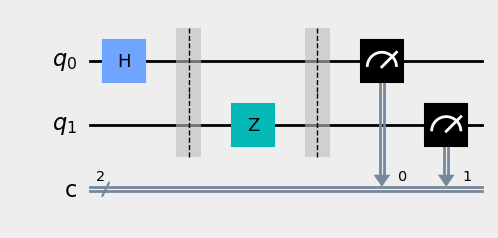

In [600]:
from qiskit import QuantumCircuit

#qc = QuantumCircuit(2, 2)  #A - sixtax error
#qc.h(q[0])
#q.barrier(q[0],q[1])
#qc.z(q[1])
#q.barrier(q[0],q[1])
#m = measure(q[0] -> c [0])
#m += measure(q[1] -> c [1])
#ac = ac + m

#qc = QuantumCircuit(2, 2)    #B - q not defined - ERROR
#qc.h(0)
#qc.barrier(q(0),q(1))
#qc.z(1)
#qc.barrier(q(0),q(1))
#m = measure(q (0), c (0))
#m = measure(q (1), c (1))
#qc = qc + m

qc=QuantumCircuit(2, 2)  #C - draw but circuit wrong
qc.h(0)
qc.barrier(0,1)
qc.z(1)
qc.barrier(0,1)
qc.measure([0, 1],[0,1])

#OPENQASM 2.0;   #D Wrong - SEE QUESTION 7 - SIMULATED
#include "gelib1.inc";
#qreg q[2]; creg c [2];
#h.q[0];
#barrier (q[0],q[1]); z.q[1];
#barrier (q[0],q[1]); measure (q[0], C[0]);
#measure (q[1], C[1]);

qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## QUESTION 52 - ASSESSMENT

Given this code fragment:\
```qc = QuantumCircuit (1)\
qc.x (0)\
qc. measure_all ()\
backend = Aer.get_backend ('qasm_simulator')\
result = execute (qc, backend).result()\
counts = result.get_counts(qc)\
print(counts)
```

Which output fits the closest with the measurement probability distribution?\
**A. `('1': 1024}`** \
B. `('0': 520, '1': 504)`\
C. `[0.+0. j 1.+0.j]`\
D. `[1.+0.j 0.+0.j]`

In [505]:
from qiskit import QuantumCircuit
qc = QuantumCircuit (1)
qc.x (0)
qc. measure_all ()
backend = Aer.get_backend ('qasm_simulator')
result = execute (qc, backend). result ()
counts = result.get_counts (qc)
print (counts)

{'1': 1024}


## QUESTION 53 - ASSESSMENT

Which code fragment could be used to produce this image?\

**A.
`legend= ['First execution', 'Second Execution' ]\
plot_histogram ([counts1, counts2], legend=legend, color= ['orange', 'black'], bar_labels=False)
`**

B.`plot_bar_plot (counts, legends, colors)`

C. ```legend=['First execution', 'Second Execution']\
plot_bar_chart (counts, legend-legend, color=['orange', 'black'])```

D. `plot_histogram (counts, title=First execution, Second Execution)`

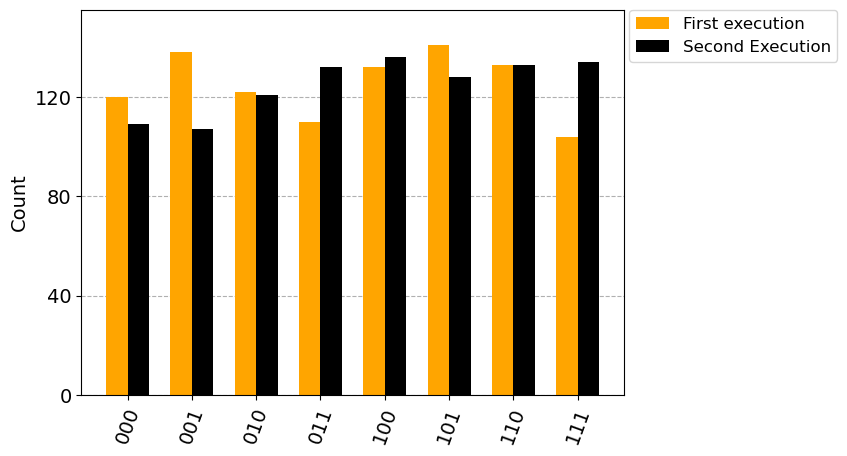

In [69]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit import Aer
from qiskit import execute
from math import pi
from qiskit import transpile

qc = QuantumCircuit(3,3)
qc.h([0,1,2])
qc.measure([0,1,2], [0,1,2])

backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = qc.compose(qc)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts1  = result.get_counts(circ)
second_result = backend.run(transpile(circ, backend), shots=1000).result()
counts2  = second_result.get_counts(circ)

legend= ['First execution', 'Second Execution' ] #A - OK
plot_histogram ([counts1, counts2], legend=legend, color= ['orange', 'black'], bar_labels=False) #A

#plot_bar_plot (counts1, legends, colors) #B wrong

#legend=['First execution', 'Second Execution']    #C wrong
#plot_bar_chart (counts, legend-legend, color=['orange', 'black']) #C wrong
 
#plot_histogram (counts, title=First execution, Second Execution) #D wrong


## QUESTION 54 - ASSESSMENT

Which two are special cases of Qiskit's 'phase' gate?

**A. T gate**\
**B. Z gate**\
C. X gate\
D. Y gate\
E. H gate\

## QUESTION 55 - ASSESSMENT

Which line of code is used to determine the fidelity of two states, state1 and state2?

**A. `statefidelity(statel, state2)`** \
B. `statevector (statel, state2)`\
C. `fidelity(statel,state2)`\
D. `statel.get_fidelity (state2)`

average_gate_fidelity() - Returns the average gate fidelity of a noisy Quantum channel
process_fidelity() - Returns the process fidelity of a noisy quantum channel
gate_error() - Returns the gate error of a noisy quantum channel
diamond_norm() - Returns the diamond norm input  of a quantum channel
state_fidelity(statea, stateb) - 
purity() - Return the purity of a quantum state
concurrence() - Returns the concurrence of a noisy quantum channel
entropy() - Returns the Von Neumann entropy of a noisy quantum channel
entanglement_of_formation() 
mutual_information() - Returns the mutual information of a bipartite state 


## QUESTION 56 - ASSESSMENT

Given an empty QuantumCircuit object, qc, with four qubits and four classical bits, which code fragment would create this circuit?

A. `qc.measure_all()`\
B. `qc.measure ([0, 0], [1,1], [2,2], [3,3])`\
C. `qc.measure (0, 1, 2, 3)`\
**D. `qc.measure ([0,1,2,3], [0,1,2,3])`**

### See Question 5 - SIMULATED

## QUESTION 57 - ASSESSMENT

Which code fragment, when run immediately after the code below, will save the following PNG image to disk?\
```
from qiskit import QuantumCircuit\
qc = QuantumCircuit (2)\
qc.cx (0,1)
```

**A. `qc.draw ('mpl', filename='circuit_drawing.png')`** \
B. `qc.draw ('latex', filename='circuit_drawing.png')` \
C. `qc.draw ('circuit_drawing.png')` \
D. `qc.write_drawing (format='png', name='circuit_drawing')`

### The only valid choices are text, latex, latex_source, and mpl


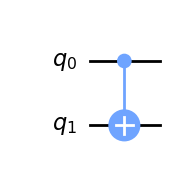

In [548]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import QuantumCircuit
qc = QuantumCircuit (2)
qc.cx(0,1)

qc.draw ('mpl', filename='circuit_drawing.png') #A
#qc.draw ('latex', filename='circuit_drawing.png') #B - WORKS BUT NEED TO IMPORT LATEX  
#qc.draw ('circuit_drawing.png') #C - wrong 
#qc.write_drawing (format='png', name='circuit drawing')  #D - wrong          

## QUESTION 58 - ASSESSMENT


Given this code:\
```
from giskit.quantum_info import DensityMatrix\
matrix1 = [ \
[1+0.j. 0+0.j], [0+0.j. 0+0.j] \
] \
matrix2 = [ \
[0.5+0.j, 0.5+0.j], [0.5+0.j, 0.5+0.j] \
] \
#Add code fragment here
```

Which code fragment would provide the below output?\
```
DensityMatrix([\
[0.5+0.j 0.5+0. j 0.+0. j 0.+0.j]\
[0.5+0. 0.5+0.j 0.+0.j 0.+0.j]\
[0.+0.j 0.+0.j 0.+0. j 0.+0.j]\
[O.+0.j O.+0.j O.+0.j O.+0.j]], dims= (2, 2))
```

**A. ```matrix1 = DensityMatrix (matrix1) \
print (matrixl.tensor (matrix2))```** 

B. ```result = DensityMatrix.tensor (matrix1, matrix2) \
print (result)```

C. `print (matrix1.tensor (matrix2) )`

D. `print (DensityMatrix.tensor (matrix1, matrix2))`

In [67]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import DensityMatrix

matrix1 = [[1+0.j, 0+0.j], [0+0.j, 0+0.j]]
matrix2 = [[0.5+0.j, 0.5+0.j], [0.5+0.j, 0.5+0.j]]

print(matrix1)
matrix1 = DensityMatrix (matrix1) #A OK
print(matrix1)
print (matrix1.tensor (matrix2)) #A OK

#result = DensityMatrix.tensor (matrix1, matrix2) #B wrong
#print (result) #B wrong

#print (matrix1.tensor(matrix2)) #C wrong

#print(DensityMatrix.tensor(matrix1, matrix2)) #C wrong

[[(1+0j), 0j], [0j, 0j]]
DensityMatrix([[1.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j]],
              dims=(2,))
DensityMatrix([[0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]],
              dims=(2, 2))


DensityMatrix takes two tensors, where matrix1 is [[1 0][0 0]] and matrix2 with [[0.5 0.5][0.5 0.5]]\
In this case, it double the sizing of Matrix (8x8). The First quadrant represented by the 1 on matrix 1 has the multiplication of elements of matrix2.\ 
[[0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j],\
[0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j],\
[0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j],\
[0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j]]\ 

OR 

[[matrix1[0][0]*matrix2, matrix[0][1]*matrix2]\
 [matrix[1][0]*matrix2, matrix[1][1]*matrix2]]
 

## QUESTION 59 - ASSESSMENT

Given this code fragment:\

```
qreg_a = QuantumRegister (2) \
qreg_b = QuantumRegister (2) \
creg = ClassicalRegister (4) \
qc = QuantumCircuit (qreg_a, qreg_b, creg) \
qc.x (qreg_a[0]) \
qc. measure (qreg_a, creg [0:2]) \
qc.measure (qreg_b,creg [2:4]) \
simulator = BasicAer.get_backend('qasm_simulator') \
result = execute (qc, simulator) .result () \
counts = result.get_counts (qc) \
print (counts)
```

What correctly displays the result for the two quantum registers?\
**A. ('0001': 1024)** \
B. ('0100': 1024)\
C. ('00 01': 1024}\
D. {'01 00': 1024}

In [591]:
from qiskit.quantum_info import DensityMatrix
from qiskit import Aer, BasicAer

qreg_a = QuantumRegister (2)
qreg_b = QuantumRegister (2)
creg = ClassicalRegister (4)
qc = QuantumCircuit (qreg_a, qreg_b, creg)
qc.x (qreg_a[0])
qc. measure (qreg_a, creg [0:2]) 
qc.measure (qreg_b,creg [2:4])
simulator = BasicAer.get_backend('qasm_simulator')
result = execute (qc, simulator).result ()
counts = result.get_counts (qc)
print (counts)

{'0001': 1024}


## QUESTION 60 - ASSESSMENT

Given this code fragment:\
```
qc = QuantumCircuit (2)\
qc. h (0)\
simulator = Aer.get_backend ('statevector_simulator')\
job = execute (qc, simulator)\
result = job.result ()\
outputstate = result.get_statevector (qc, 2)\
print (outputstate)
```

Which is closest to the output?\
A. `[0.71+0.j -0.71+0.j 0.+0.j 0.+0.j]`\
B. `[0.5+0. j 0.5+0.j 0.5+0.j 0.5+0.j]`\
C. `[0.+0. j 0.+0. 0.71+0. 0.71+0.j]`\
**D. `[0.71+0.j 0.71+0.j 0.+0.j 0.+0.j]`**

In [595]:
from qiskit.quantum_info import DensityMatrix
from qiskit import Aer, BasicAer

qc = QuantumCircuit (2)
qc. h (0)
simulator = Aer.get_backend ('statevector_simulator')
job = execute (qc, simulator)
result = job.result ()
outputstate = result.get_statevector (qc, 2)
print (outputstate)

Statevector([0.71+0.j, 0.71+0.j, 0.  +0.j, 0.  +0.j],
            dims=(2, 2))


# VERY, VERY IMPORTANT TOPICS TO REMEMBER ON EXAM

### Execution
```
simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_bloch_multivector(outputstate)
```
### Entangled Bell states 
#### See Question 5

### ROTATION OF T AND S 
#### 💡T  ROTATE PI/4   (45 Degrees OR PI/4  on Z)
#### 💡T⨥ ROTATE -PI/4 (-45 Degrees OR  7PI/4 on Z)
#### 💡S  ROTATE PI/2  on Z
#### 💡S⨥ ROTATE -PI/2 on Z
#### See Question 7

### State Vector initialization 
#### Question 8 
#### Array with combination of QUBITS probabilities - EX: for two QUBITS [%00. %01 %10 %11] 
#### Each element most significant QUBIT on RIGHT.  [%Q1Q0. %Q1Q0 %Q1Q0 %Q1Q0] 




## HERMITIAN

#### X,Y,Z ARE Hermitian operators
**Many quantum gates such as CNOT, SWAP, Toffoli, Fredkin, Hadamard, and Pauli gates, which are used frequently in quantum circuits, are Hermitian

## print(qc) and qc.draw() works fine

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               
Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


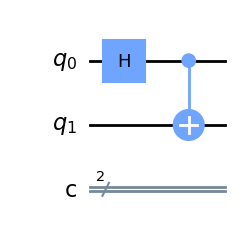

In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute
from qiskit import Aer

backend = Aer.get_backend('unitary_simulator')

q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0],q[1])

job = execute(circuit, backend, shots=8192)
result = job.result()

print(result.get_unitary(circuit,3))

circuit.draw("mpl")   #print and draw works - draw is function of QuantumCircuit
print(circuit)        #print is stand alone method

**Single-qubit gates: - U, P , Identity gate - Pauli gates - Clifford gates - C3 gates - Standard rotation gates\
**Pauli gates - X, Y, Z\
**Clifford gates - H, S, St\
**C3 Gates - T and Tt\

## Operations on hadamard

```
qc.h(0)\
# qc.h(0) qc.s(0) qc.h(0)  #point to -Y\
# qc.h(0) qc.z(0) qc.h(0)  #point TO 1\
# qc.h(0) qc.t(0) qc.h(0)  #point to pi/8 of |0> on Y\
# qc.h(0) qc.sdg(0) qc.h(0)  #point to Y \
# qc.h(0) qc.tdg(0) qc.h(0) #point to -pi/8 of |0> on Y\
qc.h(0)
``` 

#### WHEN IN HADAMARD, ONLY X AND -X ARE SUPERPOSITION
#### ALL OTHER POSITION ON "EQUATOR" ROTATE 180 DEGREES AROUND Z IF APLIED
#### ONLY qc.z(0) rotates 180 degrees and turn |+> to |->

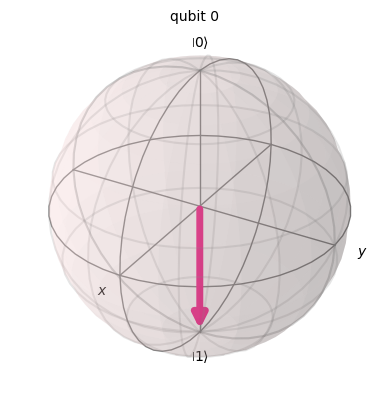

In [23]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from math import pi

qc = QuantumCircuit (1)
qc.h(0)
#qc.s(0)  #GO TO -Y
#qc.z(0)  #GO TO 1
#qc.t(0)   #pi/8 of |0> on Y
#qc.sdg(0) #point to Y
#qc.tdg(0)  #point to -pi/8 of |0> on Y
#qc.t(0)
qc.h(0)
simulator = Aer.get_backend ('statevector_simulator')
result = execute(qc, simulator).result ()
plot_bloch_multivector(result.get_statevector ())

## VERSION WITH IBM INFO

from qiskit.tools import jupyter
%qiskit_version_table

![ibm_info](ibm_info.png)

```
from qiskit.tools import jupyter
%qiskit_version_table
```
Version Information\
Qiskit Software	Version\
qiskit-terra	0.24.1\
qiskit-aer	0.12.1\
qiskit-ibmq-provider	0.20.2\
qiskit	0.43.2\
qiskit-nature	0.6.2\
qiskit-finance	0.3.4\
qiskit-optimization	0.5.0\
qiskit-machine-learning	0.6.1\
System information\
Python version	3.10.8\
Python compiler	GCC 10.4.0\
Python build	main, Nov 22 2022 08:26:04\
OS	Linux\
CPUs	8\
Memory (Gb)	31.211322784423828\
Mon Jul 10 15:00:24 2023 UTC

## Qiskit.tools

In [42]:
#from qiskit.providers.ibmq import IBMQ
#from qiskit.tools.monitor import backend_overview
#provider = IBMQ.get_provider(hub='ibm-q')
#backend_overview()

#job_monitor(job[, interval, quiet, output, ...])  #Monitor the status of a IBMQJob instance.

#backend_monitor(backend) #Monitor a single IBMQ backend.

#backend_overview() #Gives overview information on all the IBMQ backends that are available.

## qasm from file 

## LOAD
**qc.from_qasm_file(path)**

## SAVE
QuantumCircuit.qasm(formatted=False, filename=None, encoding=None)\
**Parameters\
formatted (bool) – Return formatted Qasm string.\
filename (str) – Save Qasm to file with name ‘filename’.**

## Append modules

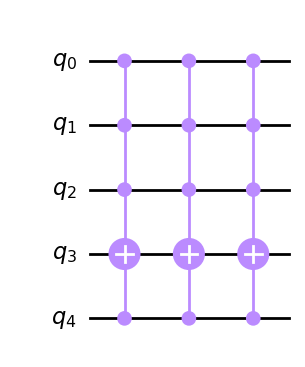

In [77]:
from qiskit.circuit.library import MCXGate
gate = MCXGate(4)
gate2 = MCXGate(4)


circuit.append(gate, [0, 1, 4, 2, 3])  # append as first paramenter, second is CBITS for measure
circuit.append(gate2, [0, 1, 4, 2, 3])  # append as first paramenter, second is CBITS for measure

circuit.draw('mpl')

## BLOCKSPHERE AND INITIALIZE

In [38]:
from qiskit import QuantumCircuit, Aer, execute
from math import sqrt
import numpy as np
from qiskit import QuantumCircuit


#qc = QuantumCircuit(1)
#v=[1,pi/2,-pi/2]
#qc.initialize(v) 

#circuit = QuantumCircuit(1)
#circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0)
#circuit.draw()


qc = QuantumCircuit(2)
qc.initialize([0, 1/np.sqrt(2), -1.j/np.sqrt(2), 0], qc.qubits)
#circuit.draw()

simulator = Aer.get_backend('statevector_simulator') 
result = execute(qc, simulator).result() 
statevector = result.get_statevector()
#plot_bloch_multivector(result.get_statevector())
print(statevector)

Statevector([ 0.        +0.j        ,  0.70710678+0.j        ,
             -0.        -0.70710678j,  0.        +0.j        ],
            dims=(2, 2))


## STATEVECTOR ALGORITHM

In [69]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from math import pi

qc = QuantumCircuit (2)
#qc.x(0)
#qc.x(0)
qc.h(0)
qc.z(0)
qc.h(1)
#qc.x(1)
qc.z(1)

simulator = Aer.get_backend ('statevector_simulator')
result = execute(qc, simulator).result ()
#plot_bloch_multivector(result.get_statevector ())
print(result.get_statevector ())

Statevector([ 0.5+0.0000000e+00j, -0.5-6.1232340e-17j, -0.5-6.1232340e-17j,
              0.5+1.2246468e-16j],
            dims=(2, 2))


#### ONE QUBIT hadamard is 1/√2 = 0.70710678+0.j
#### ONE QUBIT                                                    0                                                         1
##### hadamard from 1 - qc.x(0) qc.h(0) -   [ 0.70710678+0.00000000e+00j,      -0.70710678-8.65956056e-17j]        |->
##### hadamard from 0 - qc.h(0) -              [0.70710678+0.j,                                 0.70710678+0.j]                               |+>

#### TWO QUBIT hadamard is 1/√4 = 0.5+0.j
#### TWO QUBIT                                              00                                  01                                 10                              11                   q1q0
##### qc.x(0) - qc.h(0) - qc.x(1) - qc.h(1) - [ 0.5+0.0000000e+00j,    -0.5-6.1232340e-17j,      -0.5-6.1232340e-17j,      0.5+1.2246468e-16j]    |-->
##### qc.x(0) - qc.h(0) - qc.h(1) -               [ 0.5+0.000000e+00j,       -0.5-6.123234e-17j,         0.5+0.000000e+00j,       -0.5-6.123234e-17j]     |+->
##### qc.h(0) - qc.x(1) - qc.h(1) -               [ 0.5+0.000000e+00j,        0.5+0.000000e+00j,       -0.5-6.123234e-17j,        -0.5-6.123234e-17j]     |-+>
##### qc.h(0) qc.h(1)                  -               [0.5+0.j,                             0.5+0.j,                            0.5+0.j,                            0.5+0.j]                        /++>

##### qc.h(0) - qc.x(0) - qc.h(1) qc.x(1) -   [0.5+0.j,                            0.5+0.j,                            0.5+0.j,                             0.5+0.j]
##### qc.h(0) - qc.z(0) - qc.h(1) qcz.(1) -   [ 0.5+0.0000000e+00j,   -0.5-6.1232340e-17j,      -0.5-6.1232340e-17j,        0.5+1.2246468e-16j]  |-->
##### Z after hadamard from zero is the same as qc.x(0) and hadamard

#### easy algorithm
#### Take QUBIT position (00,01,10,11) and multiply position by position with + and =
#### 0*- + 0*- = positive  (00) and |--> (first line - first column)
#### 0*- + 1*-  - negative (01) and |-->(first line - second column)
#### 0*+ + 0*-  - positive (01) and |+->(second line - first column)
#### 0*+ + 1*-  - negative (01) and |+->(second line - second column)
#### same with other fields
#### minus is hadamard from 1 and plus is hadamard from 0

## HINTON PLOT

##### white is a positive non zero value
##### black is negative non zero value
##### grey is Zero 

## DensityMatrix X StateVector

#### State Vector hold the probability of ocurrence for each state of QUBITs
#### For the circuit
```
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)
```
#### q0 is set to one and then put in hadamard (-) and q1 is controlled and value is Zero
#### if  q0 is zero then q1 is zero so 00 is a valid probability with 1/√2 = 0.70710678+0.j
#### if q0 is 1, q1 never will be 0 so 01 is not valid and probability is zero
#### if q0 is 0, q1 never will be 1 so 10 is not valid and probability is zero 
#### if q0 is 1, q1 must be one also, so value is 1/√2 = 0.70710678+0.j

   00                          01                      10                         11
[ 0.70710678+0.00000000e+00j,  0.+0.00000000e+00j,     0.+0.00000000e+00j,       -0.70710678-8.65956056e-17j]   |+->

#### DensityMatrix is a square with combination of probabilities of all states
#### For example, for above example
#### DensityMatrix is 
               [P00x00       P00x01      P00x10     P00x11\
                P01x00       P01x01      P01x10     P01x11\
                P10x00       P10x01      P10x10     P10x11\
                P11x00       P10x01      P11x10     P11x11]\
#### wich is                 
DensityMatrix(\
               [[ 0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j],\
               [ 0. +0.j,   0. +0.j,  0. +0.j,  0. +0.j],\
               [ 0. +0.j,   0. +0.j,  0. +0.j,  0. +0.j],\
               [-0.5+0.j,   0. +0.j,  0. +0.j,  0.5+0.j]],\
              dims=(2, 2))

Statevector([ 0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2, 2))


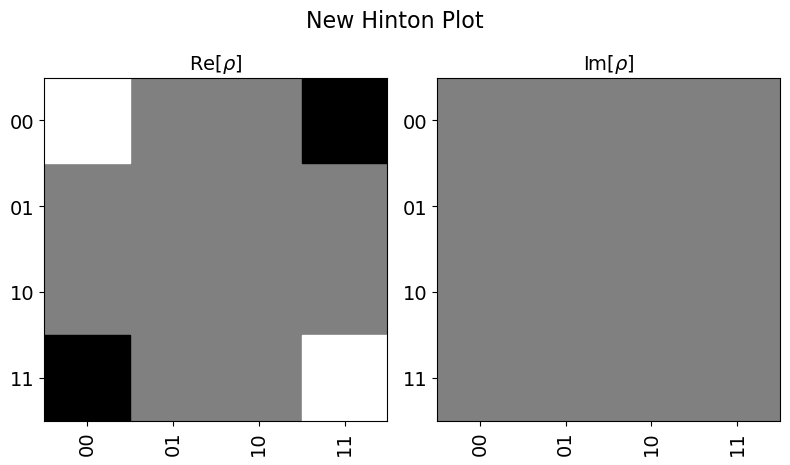

In [5]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_hinton
#%matplotlib inline

qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0, 1)

simulator = Aer.get_backend ('statevector_simulator')
result = execute(qc, simulator).result ()
print(result.get_statevector ())


state = DensityMatrix.from_instruction(qc)
#print(state)

plot_state_hinton(state, title="New Hinton Plot")

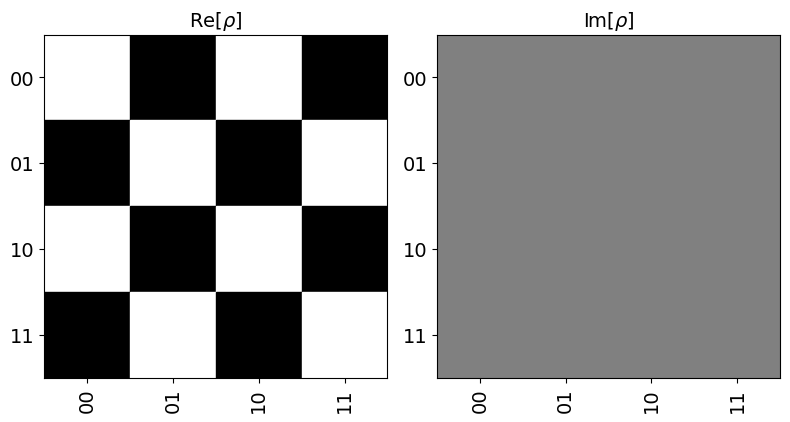

In [89]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_hinton
%matplotlib inline
#                    00               01              10            11
plot_state_hinton([1/np.sqrt(2), -1/np.sqrt(2) , 1/np.sqrt(2), -1/np.sqrt(2)])

## DensityMatrix constructors

DensityMatrix.from_instruction(qc)\
DensityMatrix.from_int\
DensityMatrix.from_label\
DensityMatrix(state_vector)\


DensityMatrix([[ 0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j],
               [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
               [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
               [-0.5+0.j,  0. +0.j,  0. +0.j,  0.5+0.j]],
              dims=(2, 2))


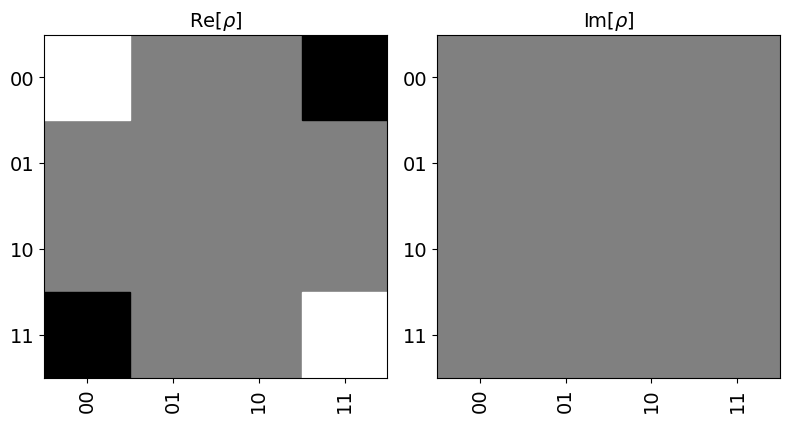

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_hinton
#%matplotlib inline
#                00                   01                         10                       11
v =  [ 0.5+0.000000e+00j,       0.5-6.123234e-17j,         0.5+0.000000e+00j,       -0.5-6.123234e-17j] 
#matrix = DensityMatrix(v)

qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0, 1)

simulator = Aer.get_backend ('statevector_simulator')
result = execute(qc, simulator).result ()
#print(result.get_statevector ())

matrix = DensityMatrix.from_instruction(qc)
print(matrix)
#matrix.draw()
#print(result.get_statevector ())
#plot_state_hinton(result.get_statevector ())
plot_state_hinton(matrix)

Circuit\
qc = QuantumCircuit(2)\
qc.x(0)\
qc.h(0)\
qc.cx(0, 1)\

State Vector\
         00                          01                   10                             11\
[ 0.70710678+0.00000000e+00j,  0.+0.00000000e+00j,     0.+0.00000000e+00j,       -0.70710678-8.65956056e-17j]   |+->\

DensityMatrix(\
               [[ 0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j],\
               [ 0. +0.j,   0. +0.j,  0. +0.j,  0. +0.j],\
               [ 0. +0.j,   0. +0.j,  0. +0.j,  0. +0.j],\
               [-0.5+0.j,   0. +0.j,  0. +0.j,  0.5+0.j]],\
              dims=(2, 2))

## PauliVec

**PauliVec show the combination of outputs that represents a certain circuit using Pauli gates (X,Y,Z,I)\
For example, for the circuit\
```
qc.h(0)\
qc.h(1)\
```
**Starting with 00 you can have\
00 -> 00 (II - Identity Identity)\
00 -> 01 (IX - Identity and flp bit)\
00 -> 10 (XI - flip bit and identiy)\
00 -> 11 (XX - flip bit and flip bit)\
see code below

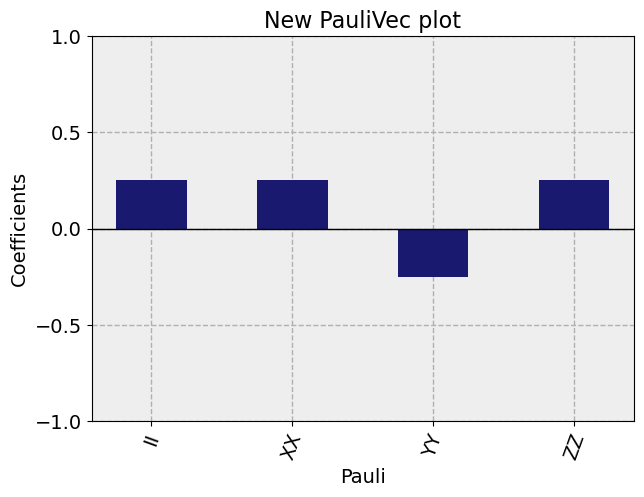

In [12]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_paulivec
%matplotlib inline

qc = QuantumCircuit(2)
#qc.h(0)
#qc.cx(0,1)
qc.h(0)
qc.h(1)

state = Statevector.from_instruction(qc)
plot_state_paulivec(state, color='midnightblue',
     title="New PauliVec plot")

## Q-SPHERE ALGORITHM

**Plot the qsphere representation of a quantum state. Here, the size of the points is proportional to the probability of the corresponding term in the state and the color represents the phase.**
**The Q-sphere is different. It is there to represent transformations between different multi-qubits states, until 5 qubits. The North Pole of the Q-sphere represents the |0⋯0⟩
 state and the South Pole represents the |1⋯1⟩
 state. Then the other states are put between them with the ones with more 1s are put closer to the South Pole. The latitudes is defined as the Hamming Distance.

Statevector([ 0.5+0.j ,  0. -0.5j, -0.5+0.j ,  0. +0.5j],
            dims=(2, 2))


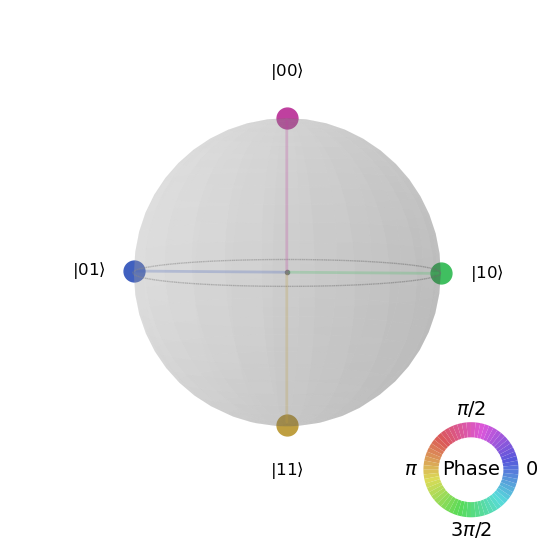

In [77]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import DensityMatrix
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere

qc = QuantumCircuit(2)
qc.x([0,1])
qc.h([0,1])
qc.s(0)
#qc.s(1)
#qc.t(0)
#qc.t(1)

state = Statevector.from_instruction(qc)
print(state)

Ψ = Statevector.from_instruction(qc)
plot_state_qsphere(Ψ)
#plot_bloch_multivector(state)

    000            001           010             011             100             101           110           111
[ 0.35355339+0.j,0.35355339+0.j,-0.35355339+0.j,-0.35355339+0.j,0.35355339+0.j,0.35355339+0.j,-0.35355339,-0.35355339]

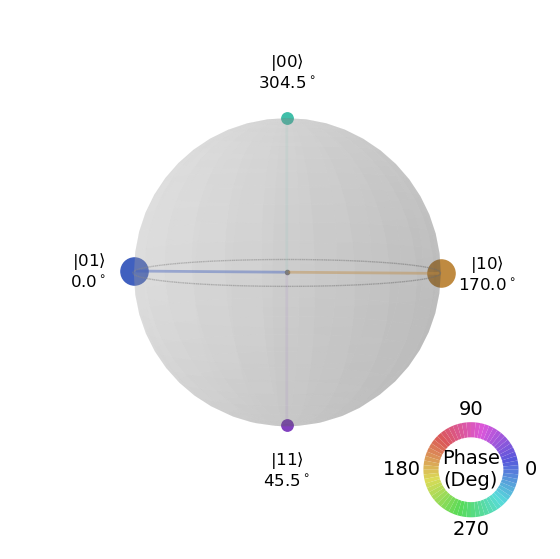

In [78]:
from qiskit.quantum_info import DensityMatrix
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector
from math import pi

qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)
qc.z(1)

state = Statevector.from_instruction(qc)
#print(state)

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)
#plot_bloch_multivector(state)

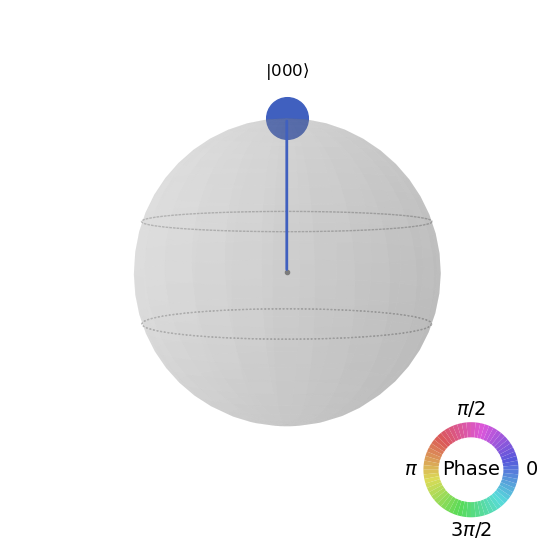

In [91]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import DensityMatrix
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere


qasm_sim = Aer.get_backend('qasm_simulator')

qc = QuantumCircuit(3)
qc.x(1)   #B
#matrix = DensityMatrix(qc)
#plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

#qc.barrier()
qc.h([0,1,2]) #C
#matrix = DensityMatrix(qc)
#plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)
#state = Statevector.from_instruction(qc)
#plot_bloch_multivector(state)

#qc.barrier()
qc.z(1)  #D
#matrix = DensityMatrix(qc)
#plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)


#qc.barrier()
qc.h([0,1,2]) #A
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)
#qc.barrier()

#qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

![slide1](slide1.png)

![slide2](slide2.png)

![slide3](slide3.png)

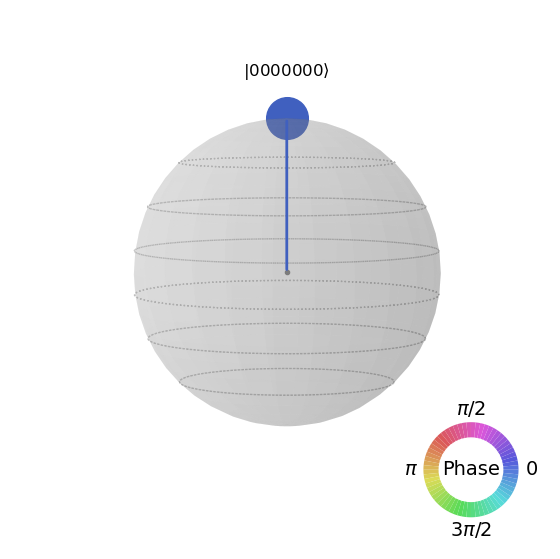

In [129]:
from qiskit.quantum_info import DensityMatrix
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
from math import pi

qc = QuantumCircuit(7)

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix,
     show_state_phases = False, use_degrees = False)

![slide3](qsphere-divisions.png)

#### Number of divisions on Q-Sphere indicate the number of Q-Sphere

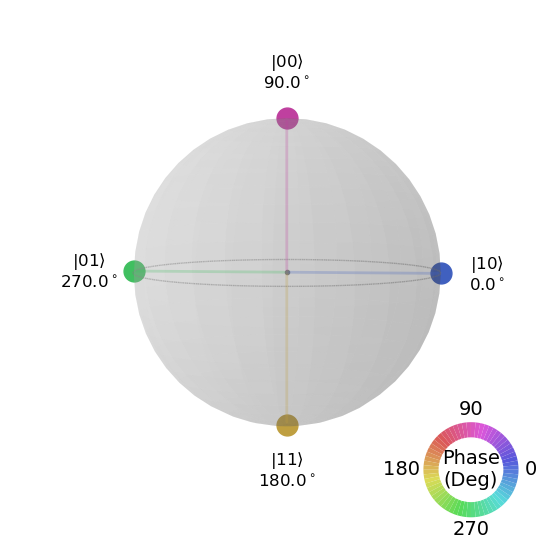

In [150]:
from qiskit.quantum_info import DensityMatrix
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector
from math import pi

qc = QuantumCircuit(2)
qc.x([0,1])
qc.h([0,1])
qc.s(1)
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)

#matrix = DensityMatrix(qc)
#plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)
#state = Statevector.from_instruction(qc)
#plot_bloch_multivector(state)

![slide3](qsphere1qubit.png)

In [163]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute

qc = QuantumCircuit(2)
qc.x(0)
qc.h([0,1])  #correct


simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
plot_bloch_multivector(outputstate)
#print(outputstate)

Statevector([ 0.5+0.000000e+00j, -0.5-6.123234e-17j,  0.5+0.000000e+00j,
             -0.5-6.123234e-17j],
            dims=(2, 2))


00     01.    10       11
[0.5   -0.5   0.5      -0.5]

1/√2 = 0.707\
1/√4 = 0.5

### After measure, no other Gate has effect on circuit - see below

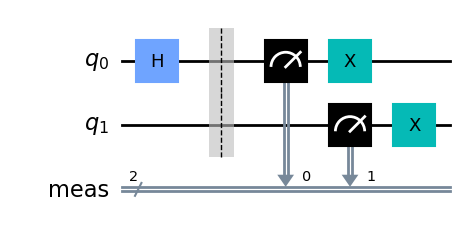

In [306]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, BasicAer, Aer
from qiskit import Aer

backend = Aer.get_backend('unitary_simulator')
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.measure_all()
circuit.x([0,1])

#job = execute(circuit, backend, shots=8192)
#result = job.result()

#print(result.get_unitary(circuit,3))

circuit.draw("mpl")   #print and draw works - draw is function of QuantumCircuit
#circuit.draw(circuit) 

In [196]:
simulator = BasicAer.get_backend('qasm_simulator')
result = execute (circuit, simulator).result ()
counts = result.get_counts (circuit)
print (counts)

{'01': 526, '00': 498}


**By the other hand, it is possible to measure part of QUBITs, change other and then measure these other

In [19]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, BasicAer, Aer
from qiskit import Aer

backend = Aer.get_backend('unitary_simulator')
circuit = QuantumCircuit(3,3)
circuit.h([0,1])
circuit.measure([0,1],[0,1])
circuit.x(2)
circuit.measure(2,2)
simulator = BasicAer.get_backend('qasm_simulator')
result = execute (circuit, simulator).result ()
counts = result.get_counts (circuit)
print (counts)

{'101': 260, '111': 238, '100': 289, '110': 237}


## plot_block_vector from array of three elements 

**array of three elements where [<\x>\, <\y>\, <\z>\] (Cartesian) or [<\r>\, <\theta>\, <\phi>\] (spherical in radians) <\theta>\ is inclination angle from +z direction <\phi>\ is azimuth from +x direction

#### [r,theta,pi ] = [r, Z, X] - r lenght arrow, Z= rotation on Z, X=rotation on X
#### [X,Y,Z] = X,Y,Z should be 1

array of three elements where [x, y, z] (Cartesian) or [r, theta, phi] (spherical in radians) theta is inclination angle from +z direction <phi> is azimuth from +x direction
![image](Bloch_sphere.svg.png) 
    
**array of three elements where [<\x>\, <\y>\, <\z>\] (Cartesian) or [<\r>\, <\theta>\, <\phi>\] (spherical in radians) <\theta>\ is inclination angle from +z direction <\phi>\ is azimuth from +x direction

# [𝜓,𝛩,𝜑 ] = [r, Z, X] - r lenght arrow, Z= projection on Z, X= projection on X (see image above)
# [X,Y,Z] = X,Y,Z one of them should be 1
    

In [1]:
# CONSTRUCTION WITH COORDINATES AND POLAR COORDINATES
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, BasicAer, Aer
from qiskit import Aer

#cartesian - only one value of [x,y,z] make sense to be one
#plot_bloch_vector([1,0,0])
# You can use spherical coordinates instead of cartesian.
plot_bloch_vector([1, np.pi/4, np.pi/4], coord_type='spherical') #see above description

NameError: name 'np' is not defined

## Unitary X DensityMatrix x StateVector

In [18]:
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, BasicAer, Aer
from qiskit import Aer

qc = QuantumCircuit(2)
qc.x(0)
#qc.x([0,1])
#qc.h([0,1])

simulator = Aer.get_backend('unitary_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_unitary(qc,1)
print(outputstate)

density = DensityMatrix(qc)
print(density)

simulator = Aer.get_backend ('statevector_simulator')
result = execute(qc, simulator).result ()
print(result.get_statevector ())

Operator([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


NameError: name 'DensityMatrix' is not defined

unitary 
Q-sphere

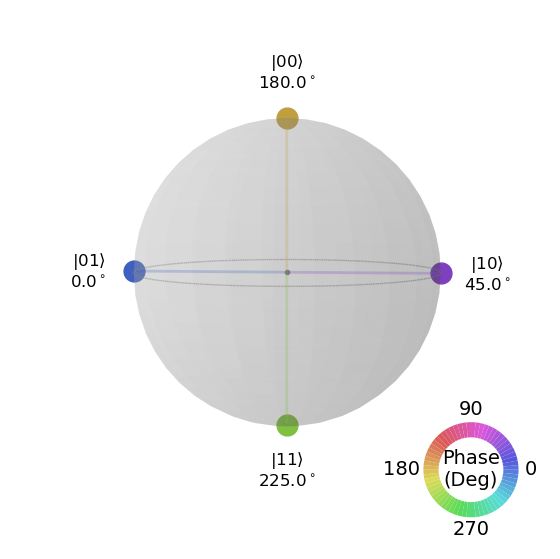

In [2]:
from qiskit.quantum_info import DensityMatrix, Statevector
import numpy as np
from qiskit import QuantumCircuit, execute, BasicAer, Aer 
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector
from math import pi

qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.x(1)
qc.h(1)
qc.rz(pi/4,1)

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)

#matrix = DensityMatrix(qc)
#plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)
#state = Statevector.from_instruction(qc)
#plot_bloch_multivector(state)

#3imulator = Aer.get_backend ('statevector_simulator')
#result = execute(qc, simulator).result ()
#print(result.get_statevector ())

DensityMatrix = stateVector X stateVector


In [3]:
import inspect
from qiskit.visualization import plot_state_qsphere

print(inspect.getsource(plot_state_qsphere))

@deprecate_arguments({"rho": "state"}, since="0.15.1")
@_optionals.HAS_MATPLOTLIB.require_in_call
@_optionals.HAS_SEABORN.require_in_call
def plot_state_qsphere(
    state,
    figsize=None,
    ax=None,
    show_state_labels=True,
    show_state_phases=False,
    use_degrees=False,
    *,
    rho=None,
    filename=None,
):
    """Plot the qsphere representation of a quantum state.
    Here, the size of the points is proportional to the probability
    of the corresponding term in the state and the color represents
    the phase.

    Args:
        state (Statevector or DensityMatrix or ndarray): an N-qubit quantum state.
        figsize (tuple): Figure size in inches.
        ax (matplotlib.axes.Axes): An optional Axes object to be used for
            the visualization output. If none is specified a new matplotlib
            Figure will be created and used. Additionally, if specified there
            will be no returned Figure since it is redundant.
        show_state_labels (bool

@deprecate_arguments({"rho": "state"}, since="0.15.1")
@_optionals.HAS_MATPLOTLIB.require_in_call
@_optionals.HAS_SEABORN.require_in_call
def plot_state_qsphere(
    state,
    figsize=None,
    ax=None,
    show_state_labels=True,
    show_state_phases=False,
    use_degrees=False,
    *,
    rho=None,
    filename=None,
):
    """Plot the qsphere representation of a quantum state.
    Here, the size of the points is proportional to the probability
    of the corresponding term in the state and the color represents
    the phase.

    Args:
        state (Statevector or DensityMatrix or ndarray): an N-qubit quantum state.
        figsize (tuple): Figure size in inches.
        ax (matplotlib.axes.Axes): An optional Axes object to be used for
            the visualization output. If none is specified a new matplotlib
            Figure will be created and used. Additionally, if specified there
            will be no returned Figure since it is redundant.
        show_state_labels (bool): An optional boolean indicating whether to
            show labels for each basis state.
        show_state_phases (bool): An optional boolean indicating whether to
            show the phase for each basis state.
        use_degrees (bool): An optional boolean indicating whether to use
            radians or degrees for the phase values in the plot.

    Returns:
        Figure: A matplotlib figure instance if the ``ax`` kwarg is not set

    Raises:
        MissingOptionalLibraryError: Requires matplotlib.
        VisualizationError: if input is not a valid N-qubit state.

        QiskitError: Input statevector does not have valid dimensions.

    Examples:
        .. plot::
           :include-source:

           from qiskit import QuantumCircuit
           from qiskit.quantum_info import Statevector
           from qiskit.visualization import plot_state_qsphere

           qc = QuantumCircuit(2)
           qc.h(0)
           qc.cx(0, 1)

           state = Statevector(qc)
           plot_state_qsphere(state)

        .. plot::
           :include-source:

           # You can show the phase of each state and use
           # degrees instead of radians

           from qiskit.quantum_info import DensityMatrix
           import numpy as np
           from qiskit import QuantumCircuit
           from qiskit.visualization import plot_state_qsphere

           qc = QuantumCircuit(2)
           qc.h([0, 1])
           qc.cz(0,1)
           qc.ry(np.pi/3, 0)
           qc.rx(np.pi/5, 1)
           qc.z(1)

           matrix = DensityMatrix(qc)
           plot_state_qsphere(matrix,
                show_state_phases = True, use_degrees = True)
    """
    from matplotlib import gridspec
    from matplotlib import pyplot as plt
    from matplotlib.patches import Circle
    import seaborn as sns
    from scipy import linalg
    from .bloch import Arrow3D

    rho = DensityMatrix(state)
    num = rho.num_qubits
    if num is None:
        raise VisualizationError("Input is not a multi-qubit quantum state.")
    # get the eigenvectors and eigenvalues
    eigvals, eigvecs = linalg.eigh(rho.data)

    if figsize is None:
        figsize = (7, 7)

    if ax is None:
        return_fig = True
        fig = plt.figure(figsize=figsize)
    else:
        return_fig = False
        fig = ax.get_figure()

    gs = gridspec.GridSpec(nrows=3, ncols=3)

    ax = fig.add_subplot(gs[0:3, 0:3], projection="3d")
    ax.axes.set_xlim3d(-1.0, 1.0)
    ax.axes.set_ylim3d(-1.0, 1.0)
    ax.axes.set_zlim3d(-1.0, 1.0)
    ax.axes.grid(False)
    ax.view_init(elev=5, azim=275)

    # Force aspect ratio
    # MPL 3.2 or previous do not have set_box_aspect
    if hasattr(ax.axes, "set_box_aspect"):
        ax.axes.set_box_aspect((1, 1, 1))

    # start the plotting
    # Plot semi-transparent sphere
    u = np.linspace(0, 2 * np.pi, 25)
    v = np.linspace(0, np.pi, 25)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(
        x, y, z, rstride=1, cstride=1, color=plt.rcParams["grid.color"], alpha=0.2, linewidth=0
    )

    # Get rid of the panes
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # traversing the eigvals/vecs backward as sorted low->high
    for idx in range(eigvals.shape[0] - 1, -1, -1):
        if eigvals[idx] > 0.001:
            # get the max eigenvalue
            state = eigvecs[:, idx]
            loc = np.absolute(state).argmax()
            # remove the global phase from max element
            angles = (np.angle(state[loc]) + 2 * np.pi) % (2 * np.pi)
            angleset = np.exp(-1j * angles)
            state = angleset * state

            d = num
            for i in range(2**num):
                # get x,y,z points
                element = bin(i)[2:].zfill(num)
                weight = element.count("1")
                zvalue = -2 * weight / d + 1
                number_of_divisions = n_choose_k(d, weight)
                weight_order = bit_string_index(element)
                angle = (float(weight) / d) * (np.pi * 2) + (
                    weight_order * 2 * (np.pi / number_of_divisions)
                )

                if (weight > d / 2) or (
                    (weight == d / 2) and (weight_order >= number_of_divisions / 2)
                ):
                    angle = np.pi - angle - (2 * np.pi / number_of_divisions)

                xvalue = np.sqrt(1 - zvalue**2) * np.cos(angle)
                yvalue = np.sqrt(1 - zvalue**2) * np.sin(angle)

                # get prob and angle - prob will be shade and angle color
                prob = np.real(np.dot(state[i], state[i].conj()))
                prob = min(prob, 1)  # See https://github.com/Qiskit/qiskit-terra/issues/4666
                colorstate = phase_to_rgb(state[i])

                alfa = 1
                if yvalue >= 0.1:
                    alfa = 1.0 - yvalue

                if not np.isclose(prob, 0) and show_state_labels:
                    rprime = 1.3
                    angle_theta = np.arctan2(np.sqrt(1 - zvalue**2), zvalue)
                    xvalue_text = rprime * np.sin(angle_theta) * np.cos(angle)
                    yvalue_text = rprime * np.sin(angle_theta) * np.sin(angle)
                    zvalue_text = rprime * np.cos(angle_theta)
                    element_text = "$\\vert" + element + "\\rangle$"
                    if show_state_phases:
                        element_angle = (np.angle(state[i]) + (np.pi * 4)) % (np.pi * 2)
                        if use_degrees:
                            element_text += "\n$%.1f^\\circ$" % (element_angle * 180 / np.pi)
                        else:
                            element_angle = pi_check(element_angle, ndigits=3).replace("pi", "\\pi")
                            element_text += "\n$%s$" % (element_angle)
                    ax.text(
                        xvalue_text,
                        yvalue_text,
                        zvalue_text,
                        element_text,
                        ha="center",
                        va="center",
                        size=12,
                    )

                ax.plot(
                    [xvalue],
                    [yvalue],
                    [zvalue],
                    markerfacecolor=colorstate,
                    markeredgecolor=colorstate,
                    marker="o",
                    markersize=np.sqrt(prob) * 30,
                    alpha=alfa,
                )

                a = Arrow3D(
                    [0, xvalue],
                    [0, yvalue],
                    [0, zvalue],
                    mutation_scale=20,
                    alpha=prob,
                    arrowstyle="-",
                    color=colorstate,
                    lw=2,
                )
                ax.add_artist(a)

            # add weight lines
            for weight in range(d + 1):
                theta = np.linspace(-2 * np.pi, 2 * np.pi, 100)
                z = -2 * weight / d + 1
                r = np.sqrt(1 - z**2)
                x = r * np.cos(theta)
                y = r * np.sin(theta)
                ax.plot(x, y, z, color=(0.5, 0.5, 0.5), lw=1, ls=":", alpha=0.5)

            # add center point
            ax.plot(
                [0],
                [0],
                [0],
                markerfacecolor=(0.5, 0.5, 0.5),
                markeredgecolor=(0.5, 0.5, 0.5),
                marker="o",
                markersize=3,
                alpha=1,
            )
        else:
            break

    n = 64
    theta = np.ones(n)
    colors = sns.hls_palette(n)

    ax2 = fig.add_subplot(gs[2:, 2:])
    ax2.pie(theta, colors=colors[5 * n // 8 :] + colors[: 5 * n // 8], radius=0.75)
    ax2.add_artist(Circle((0, 0), 0.5, color="white", zorder=1))
    offset = 0.95  # since radius of sphere is one.

    if use_degrees:
        labels = ["Phase\n(Deg)", "0", "90", "180   ", "270"]
    else:
        labels = ["Phase", "$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$"]

    ax2.text(0, 0, labels[0], horizontalalignment="center", verticalalignment="center", fontsize=14)
    ax2.text(
        offset, 0, labels[1], horizontalalignment="center", verticalalignment="center", fontsize=14
    )
    ax2.text(
        0, offset, labels[2], horizontalalignment="center", verticalalignment="center", fontsize=14
    )
    ax2.text(
        -offset, 0, labels[3], horizontalalignment="center", verticalalignment="center", fontsize=14
    )
    ax2.text(
        0, -offset, labels[4], horizontalalignment="center", verticalalignment="center", fontsize=14
    )

    if return_fig:
        matplotlib_close_if_inline(fig)
    if filename is None:
        return fig
    else:
        return fig.savefig(filename)


Easier to understand if you look at it from a single qubit circuit by applying an Hadamard followed by a Z rotation gate.
Note phase difference of each state |0> and |1>.
Ex: q0 --- H --- Z ---- Measure
State: sqrt(1-p)|0> + e(jTHETA) sqrt(p)|1>
THETA is PHASE

Somador pleno um computador quantico ![image](fulladder.png) 

RESULT:  {'10': 1} 



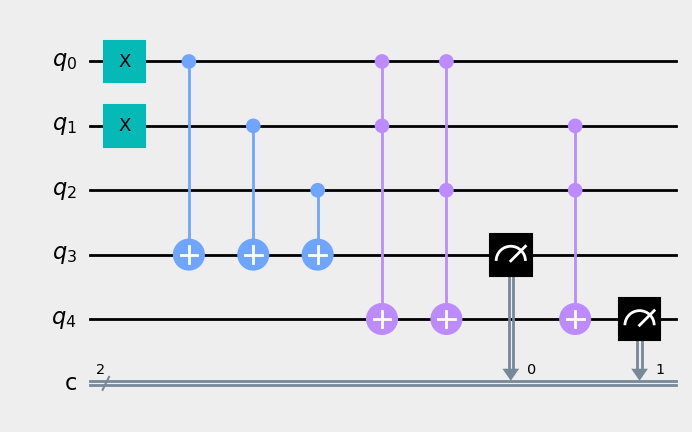

In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.x(q[1])
circuit.cx(q[0],q[3])
circuit.cx(q[1],q[3])
circuit.cx(q[2],q[3])
circuit.ccx(q[0],q[1],q[4])
circuit.ccx(q[0],q[2],q[4])
circuit.ccx(q[1],q[2],q[4])
circuit.measure(q[3],c[0])
circuit.measure(q[4],c[1])
simulator = Aer.get_backend('statevector_simulator') 
job = execute(circuit, simulator)
result = job.result()
outputstate = result.get_statevector(circuit) 
result = job.result()
counts = result.get_counts(circuit)
print('RESULT: ',counts,'\n')
circuit.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

Porta logica XOR com QUBIT ![image](xorqubit.png) 

RESULT:  {'00': 0.25, '01': 0.25, '10': 0.25, '11': 0.25} 



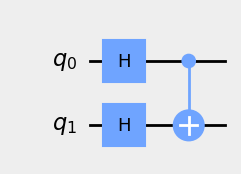

In [45]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute
qc = QuantumCircuit(2)
qc.h(1)
qc.h(0)
qc.cx(0,1)

simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
result = job.result()
counts = result.get_counts(qc)
print('RESULT: ',counts,'\n')
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

Circuito lógico para a porta NAND ![image](nand.png) 

RESULT:  {'100': 1.0} 



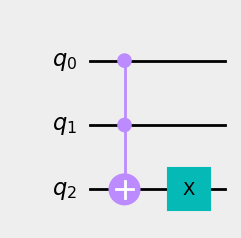

In [46]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
from qiskit import execute
qc = QuantumCircuit(3)
#qc.x(1)
#qc.x(0)
qc.ccx(0,1,2)
qc.x(2)

simulator = Aer.get_backend('statevector_simulator') 
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) 
result = job.result()
counts = result.get_counts(qc)
print('RESULT: ',counts,'\n')
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})